# Customer Segmentation Using K means Clustering 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from datetime import datetime




# LOADING THE DATASET...

In [2]:
df = pd.read_csv("/kaggle/input/credit-card-transactions-dataset/credit_card_transactions.csv")

In [3]:
print("Shape:", df.shape)
display(df.head())
display(df.info())
display(df.dtypes)
display(df.describe(include='all').T)

Shape: (1296675, 24)


Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      long city_pop  \
0    Banks      F                561 Perry Cove  ...  -81.1781     3495   
1     Gill      F  43039 Riley Greens Suite 393  ... -118.2105      149   
2  Sanchez      M      594 White Dale Suite 530  ... -112.2620     4154   
3    White      M   9443 Cynthia Court Apt. 038  ... -112.1138     1939   
4   Garcia      M              408 Bradley Rest  ...  -79.4629       99   

                                 job         dob  \
0          Psychologist, counselling  1988-03-09   
1  Special educational needs teacher  1978-06-21   
2        Nature conservation officer  1962-01-19   
3                    Patent attorney  1967-01-12   
4     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

  is_fraud  merch_zipcode  
0        0        28705.0  
1        0            NaN  
2        0        83236.0  
3        0            NaN  
4        0        22844.0  

[5 rows x 24 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

None

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
merch_zipcode            float64
dtype: object

count   unique                               top  \
Unnamed: 0             1296675.0      NaN                               NaN   
trans_date_trans_time    1296675  1274791               2019-04-22 16:02:01   
cc_num                 1296675.0      NaN                               NaN   
merchant                 1296675      693                 fraud_Kilback LLC   
category                 1296675       14                     gas_transport   
amt                    1296675.0      NaN                               NaN   
first                    1296675      352                       Christopher   
last                     1296675      481                             Smith   
gender                   1296675        2                                 F   
street                   1296675      983        0069 Robin Brooks Apt. 695   
city                     1296675      894                        Birmingham   
state                    1296675       51                                TX   
zip                    1296675.0      NaN                               NaN   
lat                    1296675.0      NaN                               NaN   
long                   1296675.0      NaN                               NaN   
city_pop               1296675.0      NaN                               NaN   
job                      1296675      494                 Film/video editor   
dob                      1296675      968                        1977-03-23   
trans_num                1296675  1296675  0b242abb623afc578575680df30655b9   
unix_time              1296675.0      NaN                               NaN   
merch_lat              1296675.0      NaN                               NaN   
merch_long             1296675.0      NaN                               NaN   
is_fraud               1296675.0      NaN                               NaN   
merch_zipcode          1100702.0      NaN                               NaN   

                         freq                  mean                    std  \
Unnamed: 0                NaN              648337.0          374317.974488   
trans_date_trans_time       4                   NaN                    NaN   
cc_num                    NaN  417192042079726784.0  1308806447000789248.0   
merchant                 4403                   NaN                    NaN   
category               131659                   NaN                    NaN   
amt                       NaN             70.351035             160.316039   
first                   26669                   NaN                    NaN   
last                    28794                   NaN                    NaN   
gender                 709863                   NaN                    NaN   
street                   3123                   NaN                    NaN   
city                     5617                   NaN                    NaN   
state                   94876                   NaN                    NaN   
zip                       NaN          48800.671097           26893.222476   
lat                       NaN             38.537622               5.075808   
long                      NaN            -90.226335              13.759077   
city_pop                  NaN          88824.440563          301956.360689   
job                      9779                   NaN                    NaN   
dob                      5636                   NaN                    NaN   
trans_num                   1                   NaN                    NaN   
unix_time                 NaN     1349243636.726123         12841278.42336   
merch_lat                 NaN             38.537338               5.109788   
merch_long                NaN            -90.226465              13.771091   
is_fraud                  NaN              0.005789               0.075863   
merch_zipcode             NaN          46825.754151            25834.00116   

                                 min                25%                 50%  \
Unnamed: 0           

In [4]:
# Showing full dataset

df

Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2019-01-01 00:00:18     2703186189652095   
1                 1   2019-01-01 00:00:44         630423337322   
2                 2   2019-01-01 00:00:51       38859492057661   
3                 3   2019-01-01 00:01:16     3534093764340240   
4                 4   2019-01-01 00:03:06      375534208663984   
...             ...                   ...                  ...   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     2720012583106919   
1296674     1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                       fraud_Lind-Buckridge  entertainment  220.11   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00   
4                        fraud_Keeling-Crist       misc_pos   41.96   
...                                      ...            ...     ...   
1296670                    fraud_Reichel Inc  entertainment   15.56   
1296671             fraud_Abernathy and Sons    food_dining   51.70   
1296672                 fraud_Stiedemann Ltd    food_dining  105.93   
1296673  fraud_Reinger, Weissnat and Strosin    food_dining   74.90   
1296674  fraud_Langosh, Wintheiser and Hyatt    food_dining    4.30   

               first       last gender                         street  ...  \
0           Jennifer      Banks      F                 561 Perry Cove  ...   
1          Stephanie       Gill      F   43039 Riley Greens Suite 393  ...   
2             Edward    Sanchez      M       594 White Dale Suite 530  ...   
3             Jeremy      White      M    9443 Cynthia Court Apt. 038  ...   
4              Tyler     Garcia      M               408 Bradley Rest  ...   
...              ...        ...    ...                            ...  ...   
1296670         Erik  Patterson      M       162 Jessica Row Apt. 072  ...   
1296671      Jeffrey      White      M  8617 Holmes Terrace Suite 651  ...   
1296672  Christopher  Castaneda      M     1632 Cohen Drive Suite 639  ...   
1296673       Joseph     Murray      M           42933 Ryan Underpass  ...   
1296674      Jeffrey      Smith      M           135 Joseph Mountains  ...   

             long city_pop                                job         dob  \
0        -81.1781     3495          Psychologist, counselling  1988-03-09   
1       -118.2105      149  Special educational needs teacher  1978-06-21   
2       -112.2620     4154        Nature conservation officer  1962-01-19   
3       -112.1138     1939                    Patent attorney  1967-01-12   
4        -79.4629       99     Dance movement psychotherapist  1986-03-28   
...           ...      ...                                ...         ...   
1296670 -112.4777      258                       Geoscientist  1961-11-24   
1296671  -77.5101      100   Production assistant, television  1979-12-11   
1296672 -105.8189      899                    Naval architect  1967-08-30   
1296673 -102.5411     1126              Volunteer coordinator  1980-08-18   
1296674 -113.8748      218           Therapist, horticultural  1995-08-16   

                                trans_num   unix_time  merch_lat  merch_long  \
0        0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1        1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2        a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3        6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4        a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   
...                  

In [5]:
# It show all columns in dataset

df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'merch_zipcode'],
      dtype='object')

In [6]:
# Statistical Analysis

df.describe()

Unnamed: 0        cc_num           amt           zip           lat  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   6.483370e+05  4.171920e+17  7.035104e+01  4.880067e+04  3.853762e+01   
std    3.743180e+05  1.308806e+18  1.603160e+02  2.689322e+04  5.075808e+00   
min    0.000000e+00  6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01   
25%    3.241685e+05  1.800429e+14  9.650000e+00  2.623700e+04  3.462050e+01   
50%    6.483370e+05  3.521417e+15  4.752000e+01  4.817400e+04  3.935430e+01   
75%    9.725055e+05  4.642255e+15  8.314000e+01  7.204200e+04  4.194040e+01   
max    1.296674e+06  4.992346e+18  2.894890e+04  9.978300e+04  6.669330e+01   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean  -9.022634e+01  8.882444e+04  1.349244e+09  3.853734e+01 -9.022646e+01   
std    1.375908e+01  3.019564e+05  1.284128e+07  5.109788e+00  1.377109e+01   
min   -1.656723e+02  2.300000e+01  1.325376e+09  1.902779e+01 -1.666712e+02   
25%   -9.679800e+01  7.430000e+02  1.338751e+09  3.473357e+01 -9.689728e+01   
50%   -8.747690e+01  2.456000e+03  1.349250e+09  3.936568e+01 -8.743839e+01   
75%   -8.015800e+01  2.032800e+04  1.359385e+09  4.195716e+01 -8.023680e+01   
max   -6.795030e+01  2.906700e+06  1.371817e+09  6.751027e+01 -6.695090e+01   

           is_fraud  merch_zipcode  
count  1.296675e+06   1.100702e+06  
mean   5.788652e-03   4.682575e+04  
std    7.586269e-02   2.583400e+04  
min    0.000000e+00   1.001000e+03  
25%    0.000000e+00   2.511400e+04  
50%    0.000000e+00   4.586000e+04  
75%    0.000000e+00   6.831900e+04  
max    1.000000e+00   9.940300e+04

# CLEANING DATA SET

In [7]:
missing = df.isnull().sum().sort_values(ascending=False)
print("Missing values:\n", missing[missing>0])

Missing values:
 merch_zipcode    195973
dtype: int64


In [8]:
dups = df.duplicated().sum()
print("Duplicate rows:", dups)

Duplicate rows: 0


In [9]:
df = df.drop_duplicates()

In [10]:

for col in df.columns:
    if 'date' in col.lower() or 'trans_date' in col.lower():
        df[col] = pd.to_datetime(df[col], errors='coerce')


In [11]:
if 'CustomerID' in df.columns:
    df = df[df['CustomerID'].notna()]


In [12]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for c in num_cols:
    med = df[c].median()
    df[c] = df[c].fillna(med)

In [13]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

In [14]:
num_cols = [col for col in df.columns if col not in ['customerID', 'cluster']]


In [15]:
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
for c in cat_cols:
    df[c] = df[c].fillna(df[c].mode().iloc[0])

In [16]:
# To remove specific columns

df.drop('merch_zipcode',axis=1,inplace=True)

In [17]:
agg_funcs = {
    'Amount': ['sum', 'mean', 'std', 'count'],   # total spend, avg txn, spend variance, txn count
}

In [18]:
if 'CustomerID' in df.columns:
    cust = df.groupby('CustomerID').agg(agg_funcs)
    # flatten columns
    cust.columns = ['_'.join(col).strip() for col in cust.columns.values]
    cust = cust.reset_index()
else:
    # if dataset already customer-level, copy
    cust = df.copy()

In [19]:
cust = cust.rename(columns={
    'Amount_sum':'total_spent',
    'Amount_mean':'avg_txn_amt',
    'Amount_std':'std_txn_amt',
    'Amount_count':'txn_count'
})
display(cust.head())

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2  Sanchez      M      594 White Dale Suite 530  ...  42.1808 -112.2620   
3    White      M   9443 Cynthia Court Apt. 038  ...  46.2306 -112.1138   
4   Garcia      M              408 Bradley Rest  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

In [20]:
print(df)

         Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2019-01-01 00:00:18     2703186189652095   
1                 1   2019-01-01 00:00:44         630423337322   
2                 2   2019-01-01 00:00:51       38859492057661   
3                 3   2019-01-01 00:01:16     3534093764340240   
4                 4   2019-01-01 00:03:06      375534208663984   
...             ...                   ...                  ...   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     2720012583106919   
1296674     1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.

In [21]:
# Use df as the transaction dataframe
txn = df.copy()

# Auto-detect customer id column
for col in ['customerid', 'cust_id', 'cc_num', 'customer_id']:
    if col in txn.columns:
        id_col = col
        break
else:
    raise KeyError("No customer ID column found. Add your column name to the list.")

# Build agg
agg = txn.groupby(id_col).agg(
    total_spent = ('amt', 'sum'),
    avg_amt     = ('amt', 'mean'),
    std_amt     = ('amt', 'std'),
    txn_count   = ('amt', 'count'),
).reset_index()

display(agg.head())


cc_num  total_spent     avg_amt      std_amt  txn_count
0  60416207185     85043.47   56.023366   122.632635       1518
1  60422928733    105640.20   69.000784   102.681962       1531
2  60423098130     58673.63  115.046333  1202.988005        510
3  60427851591     59129.61  111.987898   143.310653        528
4  60487002085     25160.11   50.726028    65.843969        496

In [22]:
agg = txn.groupby(id_col).agg(
    total_spent = ('amt', 'sum'),
    avg_amt     = ('amt', 'mean'),
    std_amt     = ('amt', 'std'),
    txn_count   = ('amt', 'count'),
    unique_merchants = ('merchant', 'nunique'),
    fraud_count = ('is_fraud', 'sum'),
    avg_city_pop = ('city_pop', 'mean'),
    mean_lat    = ('lat', 'mean'),
    mean_long   = ('long', 'mean')
).reset_index()

# Fill NaN std with 0
agg['std_amt'] = agg['std_amt'].fillna(0)

print(f"Aggregated to {len(agg):,} customers.")

Aggregated to 983 customers.


In [23]:
df.shape

(1296675, 23)

In [24]:
df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1296670    False
1296671    False
1296672    False
1296673    False
1296674    False
Length: 1296675, dtype: bool

In [25]:
# To find duplicate rows

df[df.duplicated()]

Empty DataFrame
Columns: [Unnamed: 0, trans_date_trans_time, cc_num, merchant, category, amt, first, last, gender, street, city, state, zip, lat, long, city_pop, job, dob, trans_num, unix_time, merch_lat, merch_long, is_fraud]
Index: []

[0 rows x 23 columns]

In [26]:
# To show unique Values

df['job'].unique()

array(['Psychologist, counselling', 'Special educational needs teacher',
       'Nature conservation officer', 'Patent attorney',
       'Dance movement psychotherapist', 'Transport planner',
       'Arboriculturist', 'Designer, multimedia',
       'Public affairs consultant', 'Pathologist', 'IT trainer',
       'Systems developer', 'Engineer, land', 'Systems analyst',
       'Naval architect', 'Radiographer, diagnostic',
       'Programme researcher, broadcasting/film/video', 'Energy engineer',
       'Event organiser', 'Operational researcher', 'Market researcher',
       'Probation officer', 'Leisure centre manager',
       'Corporate investment banker', 'Therapist, occupational',
       'Call centre manager', 'Police officer',
       'Education officer, museum', 'Physiotherapist', 'Network engineer',
       'Forensic psychologist', 'Geochemist',
       'Armed forces training and education officer',
       'Designer, furniture', 'Optician, dispensing',
       'Psychologist, forensic

In [27]:
# To show Unique value count

df['job'].nunique()

494

In [28]:
# To show each unique value count

df['job'].value_counts()

job
Film/video editor             9779
Exhibition designer           9199
Naval architect               8684
Surveyor, land/geomatics      8680
Materials engineer            8270
                              ... 
Information officer              8
Veterinary surgeon               8
Ship broker                      7
Contracting civil engineer       7
Warehouse manager                7
Name: count, Length: 494, dtype: int64

In [29]:
df['category'].nunique()

14

In [30]:
df['category'].unique()

array(['misc_net', 'grocery_pos', 'entertainment', 'gas_transport',
       'misc_pos', 'grocery_net', 'shopping_net', 'shopping_pos',
       'food_dining', 'personal_care', 'health_fitness', 'travel',
       'kids_pets', 'home'], dtype=object)

In [31]:
df['category'].value_counts()

category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64

In [32]:
df['merchant'].value_counts()

merchant
fraud_Kilback LLC                       4403
fraud_Cormier LLC                       3649
fraud_Schumm PLC                        3634
fraud_Kuhn LLC                          3510
fraud_Boyer PLC                         3493
                                        ... 
fraud_Douglas, DuBuque and McKenzie      775
fraud_Treutel-King                       775
fraud_Medhurst, Labadie and Gottlieb     759
fraud_Reichert-Weissnat                  753
fraud_Hahn, Douglas and Schowalter       727
Name: count, Length: 693, dtype: int64

In [33]:
# To convert datetime format

df['trans_date_trans_time']=pd.to_datetime(df['trans_date_trans_time'],errors='coerce')
df

Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2019-01-01 00:00:18     2703186189652095   
1                 1   2019-01-01 00:00:44         630423337322   
2                 2   2019-01-01 00:00:51       38859492057661   
3                 3   2019-01-01 00:01:16     3534093764340240   
4                 4   2019-01-01 00:03:06      375534208663984   
...             ...                   ...                  ...   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     2720012583106919   
1296674     1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                       fraud_Lind-Buckridge  entertainment  220.11   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00   
4                        fraud_Keeling-Crist       misc_pos   41.96   
...                                      ...            ...     ...   
1296670                    fraud_Reichel Inc  entertainment   15.56   
1296671             fraud_Abernathy and Sons    food_dining   51.70   
1296672                 fraud_Stiedemann Ltd    food_dining  105.93   
1296673  fraud_Reinger, Weissnat and Strosin    food_dining   74.90   
1296674  fraud_Langosh, Wintheiser and Hyatt    food_dining    4.30   

               first       last gender                         street  ...  \
0           Jennifer      Banks      F                 561 Perry Cove  ...   
1          Stephanie       Gill      F   43039 Riley Greens Suite 393  ...   
2             Edward    Sanchez      M       594 White Dale Suite 530  ...   
3             Jeremy      White      M    9443 Cynthia Court Apt. 038  ...   
4              Tyler     Garcia      M               408 Bradley Rest  ...   
...              ...        ...    ...                            ...  ...   
1296670         Erik  Patterson      M       162 Jessica Row Apt. 072  ...   
1296671      Jeffrey      White      M  8617 Holmes Terrace Suite 651  ...   
1296672  Christopher  Castaneda      M     1632 Cohen Drive Suite 639  ...   
1296673       Joseph     Murray      M           42933 Ryan Underpass  ...   
1296674      Jeffrey      Smith      M           135 Joseph Mountains  ...   

             lat      long  city_pop                                job  \
0        36.0788  -81.1781      3495          Psychologist, counselling   
1        48.8878 -118.2105       149  Special educational needs teacher   
2        42.1808 -112.2620      4154        Nature conservation officer   
3        46.2306 -112.1138      1939                    Patent attorney   
4        38.4207  -79.4629        99     Dance movement psychotherapist   
...          ...       ...       ...                                ...   
1296670  37.7175 -112.4777       258                       Geoscientist   
1296671  39.2667  -77.5101       100   Production assistant, television   
1296672  32.9396 -105.8189       899                    Naval architect   
1296673  43.3526 -102.5411      1126              Volunteer coordinator   
1296674  45.8433 -113.8748       218           Therapist, horticultural   

                dob                         trans_num   unix_time  merch_lat  \
0        1988-03-09  0b242abb623afc578575680df30655b9  1325376018  36.011293   
1        1978-06-21  1f76529f8574734946361c461b024d99  1325376044  49.159047   
2        1962-01-19  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704   
3        1967-01-12  6b849c168bdad6f867558c3793159a81  1325376076  47.034331   
4        1986-03-28  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999   
...             ...                          

In [34]:
# To seperate date from trans_date_trans_time column.

df['Date']=df['trans_date_trans_time'].dt.date
df

Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2019-01-01 00:00:18     2703186189652095   
1                 1   2019-01-01 00:00:44         630423337322   
2                 2   2019-01-01 00:00:51       38859492057661   
3                 3   2019-01-01 00:01:16     3534093764340240   
4                 4   2019-01-01 00:03:06      375534208663984   
...             ...                   ...                  ...   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     2720012583106919   
1296674     1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                       fraud_Lind-Buckridge  entertainment  220.11   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00   
4                        fraud_Keeling-Crist       misc_pos   41.96   
...                                      ...            ...     ...   
1296670                    fraud_Reichel Inc  entertainment   15.56   
1296671             fraud_Abernathy and Sons    food_dining   51.70   
1296672                 fraud_Stiedemann Ltd    food_dining  105.93   
1296673  fraud_Reinger, Weissnat and Strosin    food_dining   74.90   
1296674  fraud_Langosh, Wintheiser and Hyatt    food_dining    4.30   

               first       last gender                         street  ...  \
0           Jennifer      Banks      F                 561 Perry Cove  ...   
1          Stephanie       Gill      F   43039 Riley Greens Suite 393  ...   
2             Edward    Sanchez      M       594 White Dale Suite 530  ...   
3             Jeremy      White      M    9443 Cynthia Court Apt. 038  ...   
4              Tyler     Garcia      M               408 Bradley Rest  ...   
...              ...        ...    ...                            ...  ...   
1296670         Erik  Patterson      M       162 Jessica Row Apt. 072  ...   
1296671      Jeffrey      White      M  8617 Holmes Terrace Suite 651  ...   
1296672  Christopher  Castaneda      M     1632 Cohen Drive Suite 639  ...   
1296673       Joseph     Murray      M           42933 Ryan Underpass  ...   
1296674      Jeffrey      Smith      M           135 Joseph Mountains  ...   

             long city_pop                                job         dob  \
0        -81.1781     3495          Psychologist, counselling  1988-03-09   
1       -118.2105      149  Special educational needs teacher  1978-06-21   
2       -112.2620     4154        Nature conservation officer  1962-01-19   
3       -112.1138     1939                    Patent attorney  1967-01-12   
4        -79.4629       99     Dance movement psychotherapist  1986-03-28   
...           ...      ...                                ...         ...   
1296670 -112.4777      258                       Geoscientist  1961-11-24   
1296671  -77.5101      100   Production assistant, television  1979-12-11   
1296672 -105.8189      899                    Naval architect  1967-08-30   
1296673 -102.5411     1126              Volunteer coordinator  1980-08-18   
1296674 -113.8748      218           Therapist, horticultural  1995-08-16   

                                trans_num   unix_time  merch_lat  merch_long  \
0        0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1        1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2        a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3        6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4        a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   
...                  

In [35]:
# To seperate Month from trans_date_trans_time column.

df['month']=df['trans_date_trans_time'].dt.month_name()
df

Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2019-01-01 00:00:18     2703186189652095   
1                 1   2019-01-01 00:00:44         630423337322   
2                 2   2019-01-01 00:00:51       38859492057661   
3                 3   2019-01-01 00:01:16     3534093764340240   
4                 4   2019-01-01 00:03:06      375534208663984   
...             ...                   ...                  ...   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     2720012583106919   
1296674     1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                       fraud_Lind-Buckridge  entertainment  220.11   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00   
4                        fraud_Keeling-Crist       misc_pos   41.96   
...                                      ...            ...     ...   
1296670                    fraud_Reichel Inc  entertainment   15.56   
1296671             fraud_Abernathy and Sons    food_dining   51.70   
1296672                 fraud_Stiedemann Ltd    food_dining  105.93   
1296673  fraud_Reinger, Weissnat and Strosin    food_dining   74.90   
1296674  fraud_Langosh, Wintheiser and Hyatt    food_dining    4.30   

               first       last gender                         street  ...  \
0           Jennifer      Banks      F                 561 Perry Cove  ...   
1          Stephanie       Gill      F   43039 Riley Greens Suite 393  ...   
2             Edward    Sanchez      M       594 White Dale Suite 530  ...   
3             Jeremy      White      M    9443 Cynthia Court Apt. 038  ...   
4              Tyler     Garcia      M               408 Bradley Rest  ...   
...              ...        ...    ...                            ...  ...   
1296670         Erik  Patterson      M       162 Jessica Row Apt. 072  ...   
1296671      Jeffrey      White      M  8617 Holmes Terrace Suite 651  ...   
1296672  Christopher  Castaneda      M     1632 Cohen Drive Suite 639  ...   
1296673       Joseph     Murray      M           42933 Ryan Underpass  ...   
1296674      Jeffrey      Smith      M           135 Joseph Mountains  ...   

        city_pop                                job         dob  \
0           3495          Psychologist, counselling  1988-03-09   
1            149  Special educational needs teacher  1978-06-21   
2           4154        Nature conservation officer  1962-01-19   
3           1939                    Patent attorney  1967-01-12   
4             99     Dance movement psychotherapist  1986-03-28   
...          ...                                ...         ...   
1296670      258                       Geoscientist  1961-11-24   
1296671      100   Production assistant, television  1979-12-11   
1296672      899                    Naval architect  1967-08-30   
1296673     1126              Volunteer coordinator  1980-08-18   
1296674      218           Therapist, horticultural  1995-08-16   

                                trans_num   unix_time  merch_lat  merch_long  \
0        0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1        1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2        a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3        6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4        a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   
...                                   ...         ...        ...         ...   
1296670  440b587732da4dc1a6395aba5fb41669  1371816728  36.841

In [36]:
# To seperate year from trans_date_trans_time column.

df['year']=df['trans_date_trans_time'].dt.year
df

Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2019-01-01 00:00:18     2703186189652095   
1                 1   2019-01-01 00:00:44         630423337322   
2                 2   2019-01-01 00:00:51       38859492057661   
3                 3   2019-01-01 00:01:16     3534093764340240   
4                 4   2019-01-01 00:03:06      375534208663984   
...             ...                   ...                  ...   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     2720012583106919   
1296674     1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                       fraud_Lind-Buckridge  entertainment  220.11   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00   
4                        fraud_Keeling-Crist       misc_pos   41.96   
...                                      ...            ...     ...   
1296670                    fraud_Reichel Inc  entertainment   15.56   
1296671             fraud_Abernathy and Sons    food_dining   51.70   
1296672                 fraud_Stiedemann Ltd    food_dining  105.93   
1296673  fraud_Reinger, Weissnat and Strosin    food_dining   74.90   
1296674  fraud_Langosh, Wintheiser and Hyatt    food_dining    4.30   

               first       last gender                         street  ...  \
0           Jennifer      Banks      F                 561 Perry Cove  ...   
1          Stephanie       Gill      F   43039 Riley Greens Suite 393  ...   
2             Edward    Sanchez      M       594 White Dale Suite 530  ...   
3             Jeremy      White      M    9443 Cynthia Court Apt. 038  ...   
4              Tyler     Garcia      M               408 Bradley Rest  ...   
...              ...        ...    ...                            ...  ...   
1296670         Erik  Patterson      M       162 Jessica Row Apt. 072  ...   
1296671      Jeffrey      White      M  8617 Holmes Terrace Suite 651  ...   
1296672  Christopher  Castaneda      M     1632 Cohen Drive Suite 639  ...   
1296673       Joseph     Murray      M           42933 Ryan Underpass  ...   
1296674      Jeffrey      Smith      M           135 Joseph Mountains  ...   

                                       job         dob  \
0                Psychologist, counselling  1988-03-09   
1        Special educational needs teacher  1978-06-21   
2              Nature conservation officer  1962-01-19   
3                          Patent attorney  1967-01-12   
4           Dance movement psychotherapist  1986-03-28   
...                                    ...         ...   
1296670                       Geoscientist  1961-11-24   
1296671   Production assistant, television  1979-12-11   
1296672                    Naval architect  1967-08-30   
1296673              Volunteer coordinator  1980-08-18   
1296674           Therapist, horticultural  1995-08-16   

                                trans_num   unix_time  merch_lat  merch_long  \
0        0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1        1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2        a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3        6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4        a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   
...                                   ...         ...        ...         ...   
1296670  440b587732da4dc1a6395aba5fb41669  1371816728  36.841266 -111.690765   
1296671  278000d2e0d2277d1de2f890067dcc0a  1371816739  38.906881  -78.246528   
1296672  

In [37]:
# Year wise Value count

df['year'].value_counts()

year
2019    924850
2020    371825
Name: count, dtype: int64

In [38]:
# Month wise Values count

df['month'].value_counts()

month
May          146875
June         143811
March        143789
December     141060
April        134970
January      104727
February      97657
August        87359
July          86596
September     70652
November      70421
October       68758
Name: count, dtype: int64

In [39]:
# year wise gas transport category

df[(df['category']=='gas_transport')&(df['year']==2019)]

Unnamed: 0 trans_date_trans_time               cc_num  \
3                3   2019-01-01 00:01:16     3534093764340240   
5                5   2019-01-01 00:04:08     4767265376804500   
7                7   2019-01-01 00:05:08     6011360759745864   
21              21   2019-01-01 00:14:37     2305336922781618   
38              38   2019-01-01 00:27:56       30561214688470   
...            ...                   ...                  ...   
923024      923024   2019-12-31 11:44:26     3564839259330465   
923033      923033   2019-12-31 11:49:04     3517814635263522   
923034      923034   2019-12-31 11:50:15     4450831335606294   
923035      923035   2019-12-31 11:51:19  4358137750029944984   
923049      923049   2019-12-31 11:58:27         639077309909   

                                    merchant       category    amt     first  \
3         fraud_Kutch, Hermiston and Farrell  gas_transport  45.00    Jeremy   
5           fraud_Stroman, Hudson and Erdman  gas_transport  94.63  Jennifer   
7                       fraud_Corwin-Collins  gas_transport  71.65    Steven   
21                          fraud_Harris Inc  gas_transport  50.79   Jeffrey   
38                          fraud_Harber Inc  gas_transport  82.22      Gina   
...                                      ...            ...    ...       ...   
923024                    fraud_Luettgen PLC  gas_transport  49.01    Robert   
923033                      fraud_Huels-Hahn  gas_transport  61.11   William   
923034             fraud_Ledner-Pfannerstill  gas_transport  59.03     Donna   
923035          fraud_Lind, Huel and McClure  gas_transport  43.75      Dawn   
923049  fraud_Tillman, Dickinson and Labadie  gas_transport  68.69    Justin   

            last gender                              street  ...  \
3          White      M         9443 Cynthia Court Apt. 038  ...   
5         Conner      F                   4655 David Island  ...   
7       Williams      M           231 Flores Pass Suite 720  ...   
21          Rice      M                 21447 Powell Circle  ...   
38      Morrison      F       41851 Victor Drives Suite 219  ...   
...          ...    ...                                 ...  ...   
923024    Ashley      M  1250 Christopher Prairie Suite 016  ...   
923033    Cannon      M     43809 Kenneth Circles Suite 152  ...   
923034     Davis      F                  6760 Donovan Lakes  ...   
923035  Stephens      F       91542 Marissa Shores Apt. 053  ...   
923049    Carter      M         853 Miller Bypass Suite 802  ...   

                                                job         dob  \
3                                   Patent attorney  1967-01-12   
5                                 Transport planner  1961-06-19   
7                              Designer, multimedia  1947-08-21   
21                                Probation officer  1961-02-14   
38                      Scientist, research (maths)  1998-10-01   
...                                             ...         ...   
923024  Armed forces training and education officer  1959-03-31   
923033          Chartered public finance accountant  1941-10-16   
923034                    Occupational psychologist  1972-01-20   
923035                         Sports administrator  1972-10-05   
923049                        Engineer, electronics  1967-10-18   

                               trans_num   unix_time  merch_lat  merch_long  \
3       6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
5       189a841a0a8ba03058526bcfe566aab5  1325376248  40.653382  -76.152667   
7       6d294ed2cc447d2c71c7171a3d54967c  1325376308  38.948089  -78.540296   
21      b9c4615bec3561c8e83b0c1d6c7028e2  1325376877  40.188930  -91.955115   
38      61bcb858dd5c8e2d0d46d02b4fa0bf8e  1325377676  40.586238  -75.802249   
...                                  ...         ...        ...         ...   
923024  c7aba5b81843c808e5ce2628904d13d2  1356954266  37.487325 -121.806240   
923033  0643

In [40]:
# year wise grocerry_pos category

df[(df['category']=='grocery_pos')&(df['year']==2020)]


Unnamed: 0 trans_date_trans_time            cc_num  \
924857       924857   2020-01-01 00:11:03      581508178315   
924862       924862   2020-01-01 00:21:17   377113842678100   
924866       924866   2020-01-01 00:31:42      573860193545   
924869       924869   2020-01-01 00:34:20  3593118134380341   
924871       924871   2020-01-01 00:35:55    30270432095985   
...             ...                   ...               ...   
1296626     1296626   2020-06-21 11:51:22  3506040590383211   
1296636     1296636   2020-06-21 11:55:56  3534330126107879   
1296639     1296639   2020-06-21 11:57:21  4449530933957323   
1296640     1296640   2020-06-21 11:57:29      676248282243   
1296642     1296642   2020-06-21 11:59:45  3585740823295298   

                                   merchant     category     amt     first  \
924857              fraud_McDermott-Weimann  grocery_pos  104.73   Michael   
924862                     fraud_Barton Inc  grocery_pos  118.76     Billy   
924866                      fraud_Kuhic Inc  grocery_pos   81.12  Cristian   
924869                fraud_Vandervort-Funk  grocery_pos  128.43     Laura   
924871        fraud_Lockman, West and Runte  grocery_pos  100.66      Lisa   
...                                     ...          ...     ...       ...   
1296626                 fraud_Auer-Mosciski  grocery_pos   84.81   Michael   
1296636       fraud_Lockman, West and Runte  grocery_pos   98.98   Jeffrey   
1296639  fraud_Mosciski, Gislason and Mertz  grocery_pos  135.51   Felicia   
1296640       fraud_Lockman, West and Runte  grocery_pos   86.86    Amanda   
1296642             fraud_Cartwright-Harris  grocery_pos   55.24     James   

              last gender                           street  ...  \
924857      Vargas      M                933 Martin Rapids  ...   
924862   Gallagher      M                 673 Delgado Burg  ...   
924866       Jones      M       0423 Kirby Field Suite 623  ...   
924869       Casey      F                   6114 Moran Way  ...   
924871         Lin      F                 908 Brooks Brook  ...   
...            ...    ...                              ...  ...   
1296626     Orozco      M  13956 Hughes Causeway Suite 124  ...   
1296636      Smith      M          713 Scott Pike Apt. 712  ...   
1296639      Mckee      F               84079 Thomas Burgs  ...   
1296640    Wheeler      F                   329 Emily Cape  ...   
1296642     Greene      M    082 Hernandez Bypass Apt. 886  ...   

                                      job         dob  \
924857      Clothing/textile technologist  1978-08-08   
924862            Insurance risk surveyor  1965-03-25   
924866                Trade mark attorney  1986-07-23   
924869                               Make  1959-05-10   
924871           Environmental consultant  1972-11-28   
...                                   ...         ...   
1296626                    Chief of Staff  1989-03-09   
1296636           Chartered loss adjuster  1978-01-15   
1296639         Occupational psychologist  1954-07-05   
1296640  Higher education careers adviser  1968-02-09   
1296642                 Librarian, public  1998-03-18   

                                trans_num   unix_time  merch_lat  merch_long  \
924857   fdff20b528689f1a138800ff0ee5c001  1356999063  33.229559  -99.323621   
924862   4bb9a00bdf29d10291df8ce86bfe8ac3  1356999677  39.145540  -75.673623   
924866   6e3a45dca14286119701175bd2ab42ec  1357000302  41.892222  -87.453291   
924869   73b09db036000bb15aa854a11e652778  1357000460  44.336822  -66.983348   
924871   582776d6c8ab5ec25acc19fb6460bff4  1357000555  40.798722  -90.719494   
...                                   ...         ...        ...         ...   
1296626  0e358edda265903a10232eaa2cb48574  1371815482  46.042326 -111.192776   
1296636  e064f1755c6491e6196a8798d3cd4c4c  1371815756  45.255121 -108.965818   
1296639  2f518db072a442edd69b6d9880b2b390  1371815841  38.987178 -123.901733   
1296640  8f52ea71d0862f88

In [41]:
# Make sure 'dob' is in datetime format first

df['dob'] = pd.to_datetime(df['dob'], errors='coerce')


In [42]:
# Create Age column from DoB

df['Age']=datetime.now().year-df['dob'].dt.year
df

Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2019-01-01 00:00:18     2703186189652095   
1                 1   2019-01-01 00:00:44         630423337322   
2                 2   2019-01-01 00:00:51       38859492057661   
3                 3   2019-01-01 00:01:16     3534093764340240   
4                 4   2019-01-01 00:03:06      375534208663984   
...             ...                   ...                  ...   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     2720012583106919   
1296674     1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                       fraud_Lind-Buckridge  entertainment  220.11   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00   
4                        fraud_Keeling-Crist       misc_pos   41.96   
...                                      ...            ...     ...   
1296670                    fraud_Reichel Inc  entertainment   15.56   
1296671             fraud_Abernathy and Sons    food_dining   51.70   
1296672                 fraud_Stiedemann Ltd    food_dining  105.93   
1296673  fraud_Reinger, Weissnat and Strosin    food_dining   74.90   
1296674  fraud_Langosh, Wintheiser and Hyatt    food_dining    4.30   

               first       last gender                         street  ...  \
0           Jennifer      Banks      F                 561 Perry Cove  ...   
1          Stephanie       Gill      F   43039 Riley Greens Suite 393  ...   
2             Edward    Sanchez      M       594 White Dale Suite 530  ...   
3             Jeremy      White      M    9443 Cynthia Court Apt. 038  ...   
4              Tyler     Garcia      M               408 Bradley Rest  ...   
...              ...        ...    ...                            ...  ...   
1296670         Erik  Patterson      M       162 Jessica Row Apt. 072  ...   
1296671      Jeffrey      White      M  8617 Holmes Terrace Suite 651  ...   
1296672  Christopher  Castaneda      M     1632 Cohen Drive Suite 639  ...   
1296673       Joseph     Murray      M           42933 Ryan Underpass  ...   
1296674      Jeffrey      Smith      M           135 Joseph Mountains  ...   

               dob                         trans_num   unix_time  merch_lat  \
0       1988-03-09  0b242abb623afc578575680df30655b9  1325376018  36.011293   
1       1978-06-21  1f76529f8574734946361c461b024d99  1325376044  49.159047   
2       1962-01-19  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704   
3       1967-01-12  6b849c168bdad6f867558c3793159a81  1325376076  47.034331   
4       1986-03-28  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999   
...            ...                               ...         ...        ...   
1296670 1961-11-24  440b587732da4dc1a6395aba5fb41669  1371816728  36.841266   
1296671 1979-12-11  278000d2e0d2277d1de2f890067dcc0a  1371816739  38.906881   
1296672 1967-08-30  483f52fe67fabef353d552c1e662974c  1371816752  33.619513   
1296673 1980-08-18  d667cdcbadaaed3da3f4020e83591c83  1371816816  42.788940   
1296674 1995-08-16  8f7c8e4ab7f25875d753b422917c98c9  1371816817  46.565983   

         merch_long  is_fraud        Date    month  year  Age  
0        -82.048315         0  2019-01-01  January  2019   37  
1       -118.186462         0  2019-01-01  January  2019   47  
2       -112.154481         0  2019-01-01  January  2019   63  
3       -112.561071         0  2019-01-01  January  2019   58  
4        -78.632459         0  2019-01-01  January  2019   39  
...             ...       ...         ...      ...   ...  ...  
1296670 -111.690765         0

In [43]:
# Save to CSV
df.to_csv("cleaned_data.csv", index=False)

print(" Cleaned dataset saved as cleaned_data.csv")

 Cleaned dataset saved as cleaned_data.csv


# Exploratory Data Analysis ( EDA )

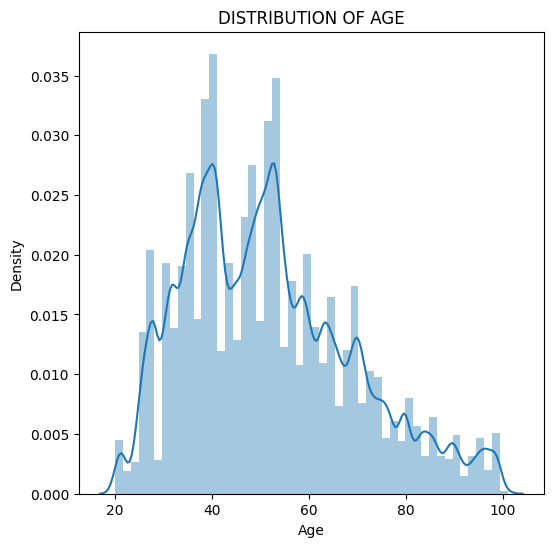

In [44]:
#DISTRIBUTION OF AGE

plt.figure(figsize=(6,6))
sns.distplot(df['Age'])
plt.title('DISTRIBUTION OF AGE')
plt.show()

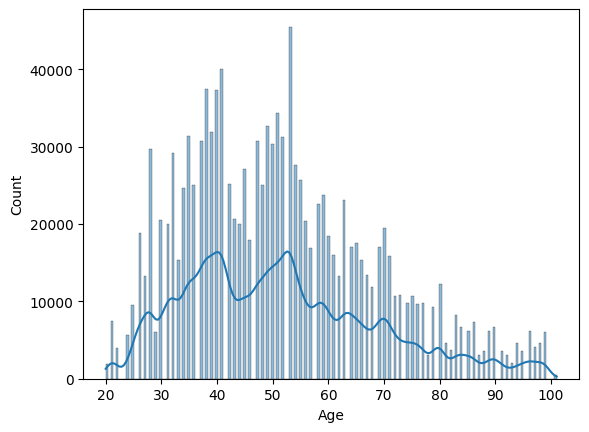

In [45]:
sns.histplot(df['Age'],kde=True)
plt.show()

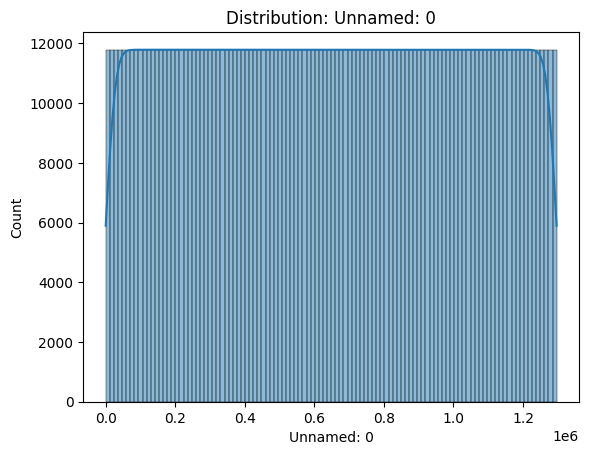

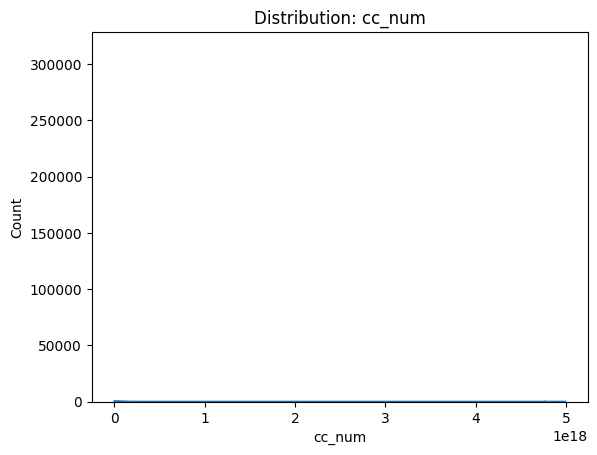

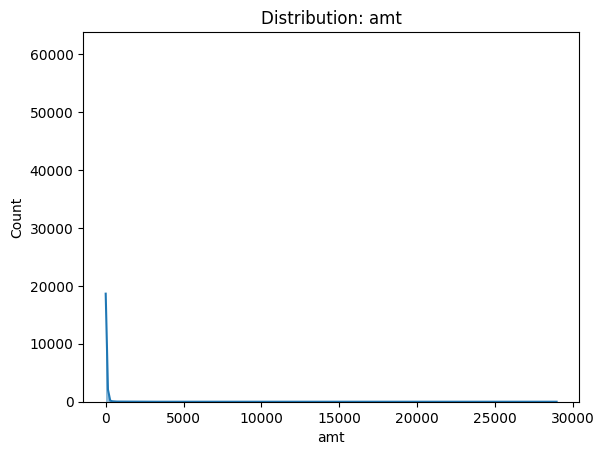

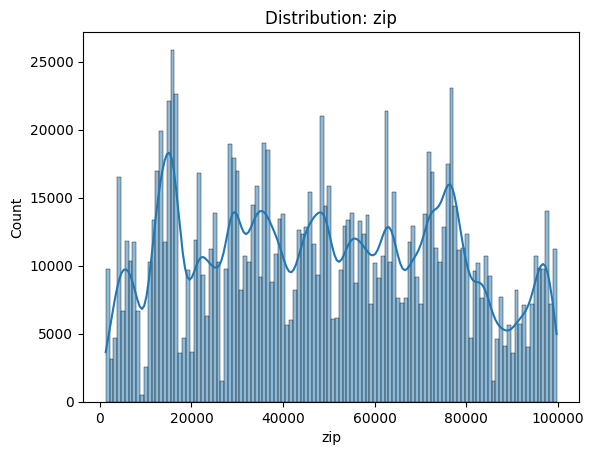

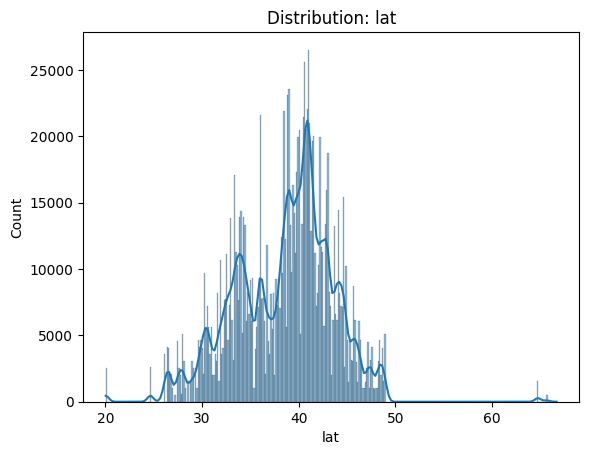

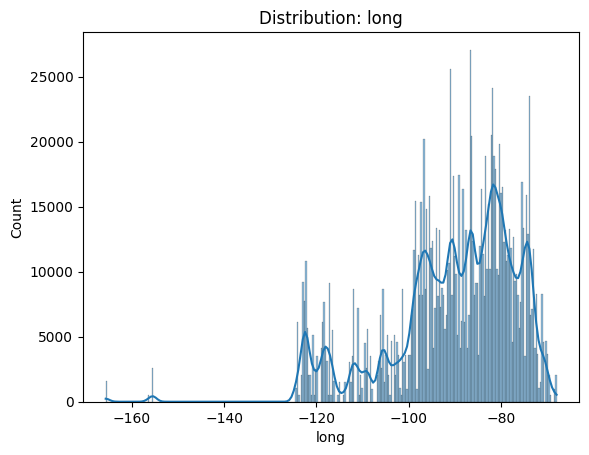

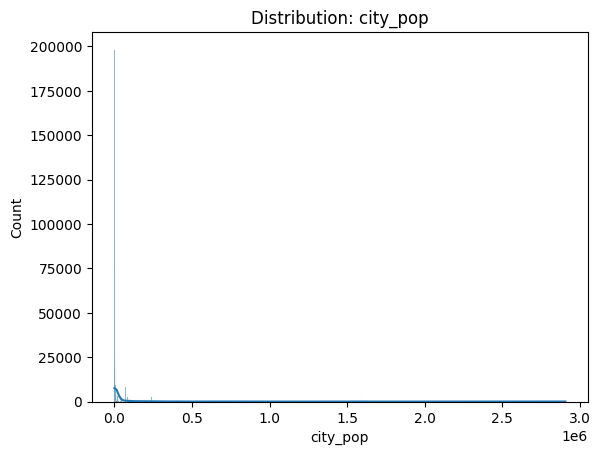

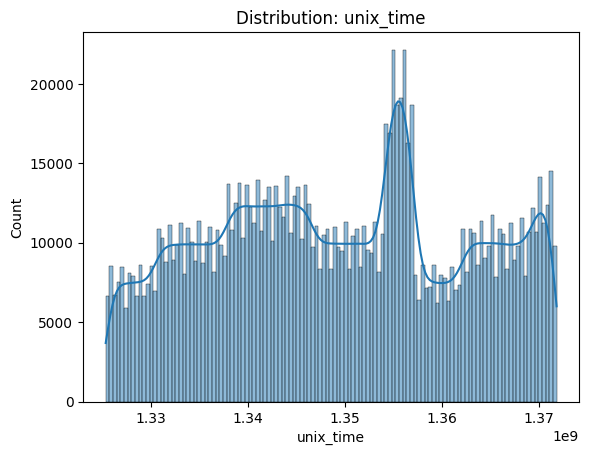

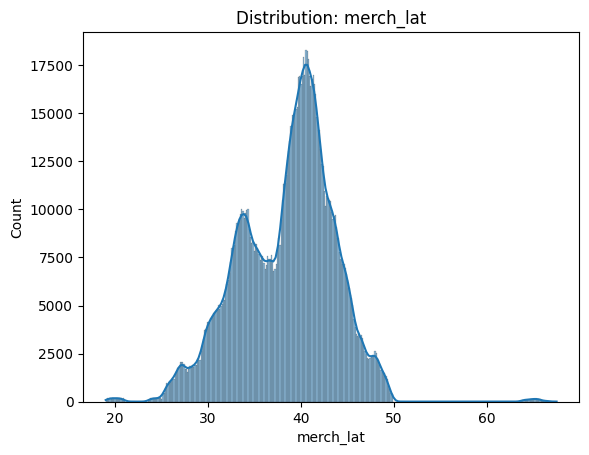

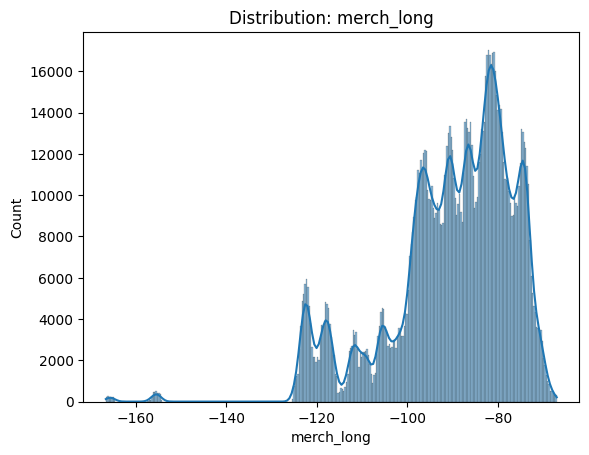

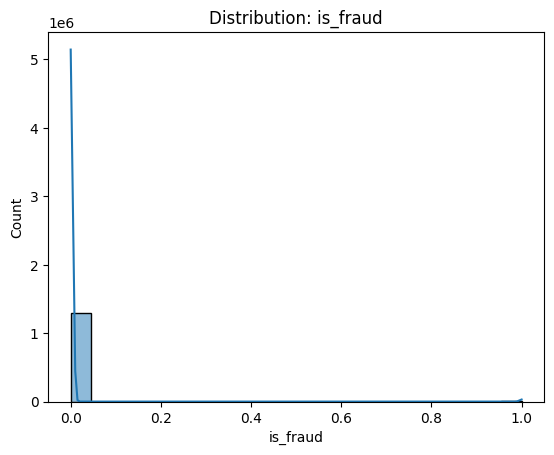

In [46]:
# Histograms for numeric features
num_cols = cust.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [c for c in num_cols if c != 'CustomerID']  # drop id

for c in num_cols:
    plt.figure()
    sns.histplot(cust[c].dropna(), kde=True)
    plt.title(f'Distribution: {c}')
    plt.show()

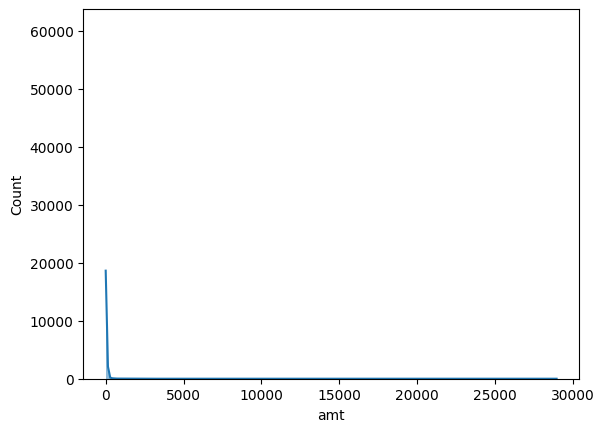

In [47]:
sns.histplot(df['amt'],kde=True)
plt.show()

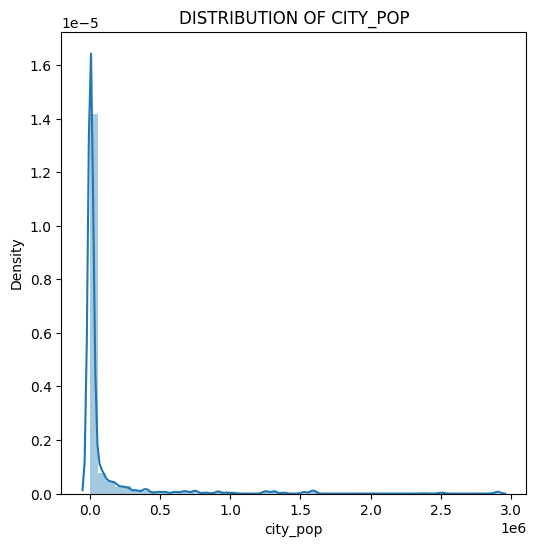

In [48]:
#DISTRIBUTION OF CITY_POP

plt.figure(figsize=(6,6))
sns.distplot(df['city_pop'])
plt.title('DISTRIBUTION OF CITY_POP')
plt.show()

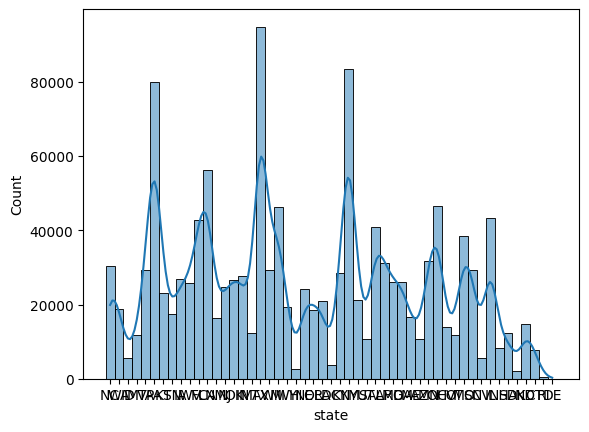

In [49]:
sns.histplot(df['state'],kde=True)
plt.show()

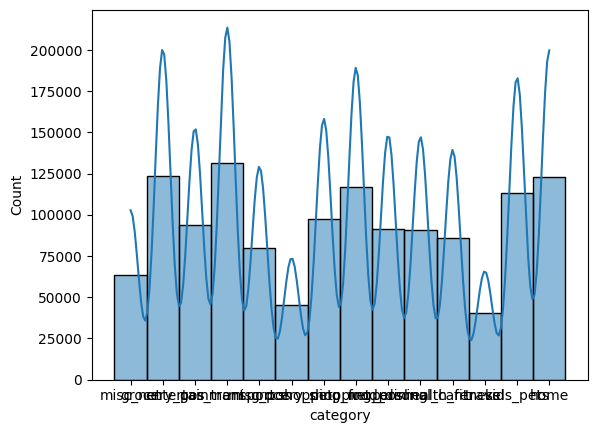

In [50]:
sns.histplot(df['category'],kde=True)
plt.show()

<Axes: xlabel='year'>

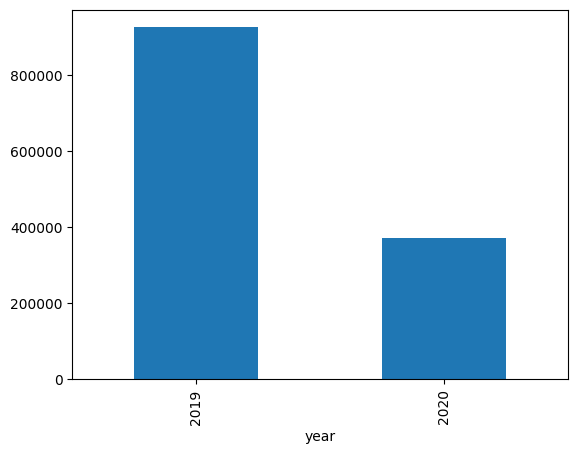

In [51]:
# Now Analysing Data set uning plots

df['year'].value_counts().plot(kind='bar')


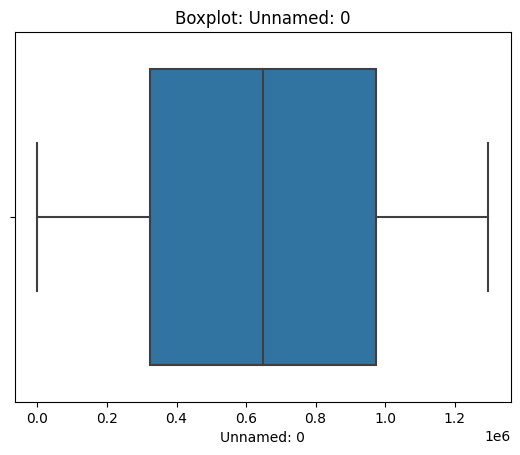

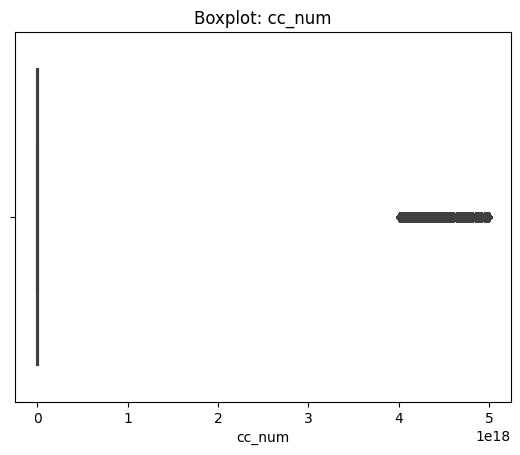

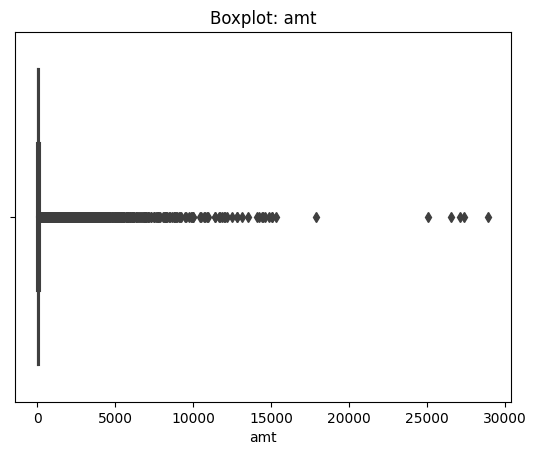

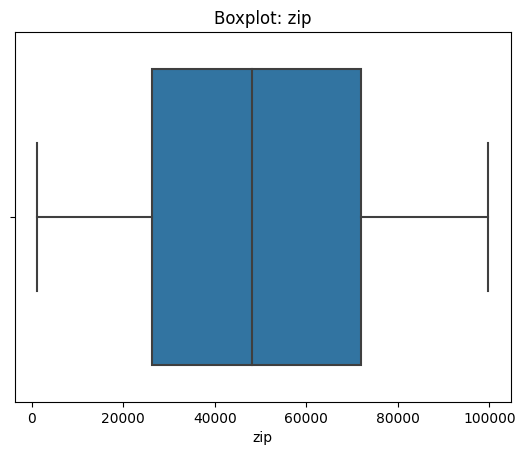

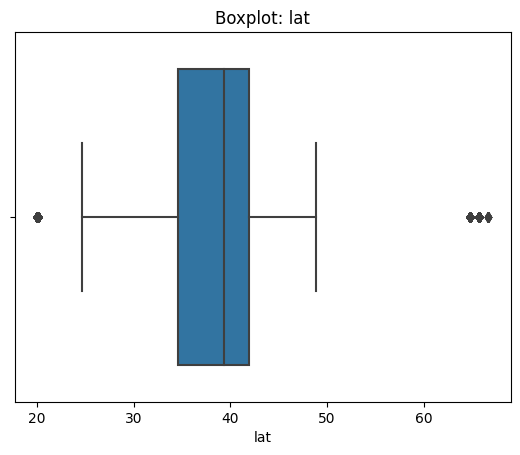

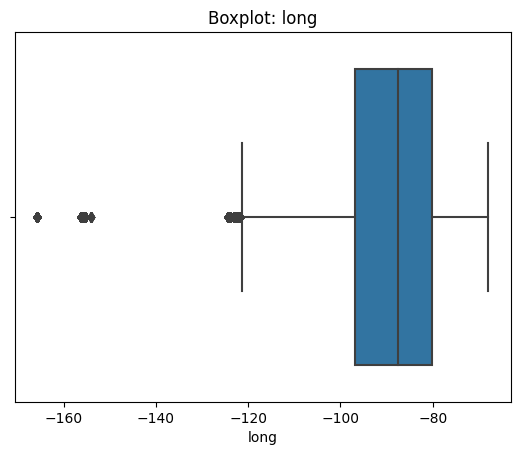

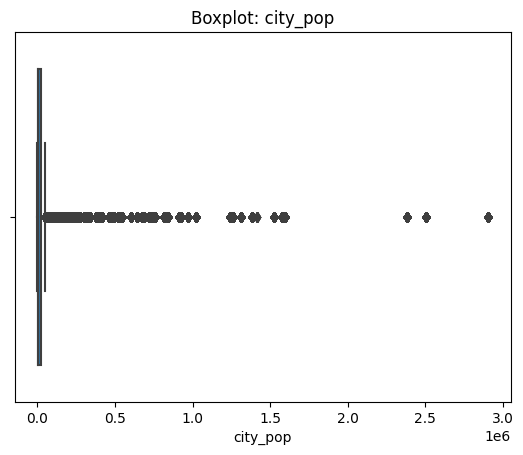

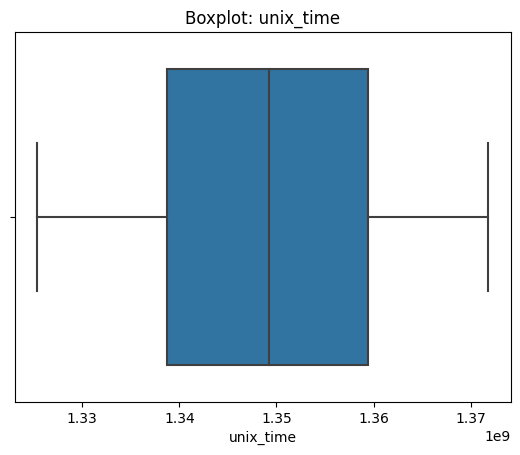

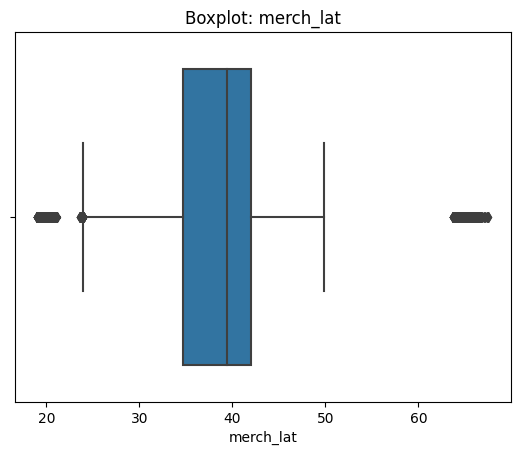

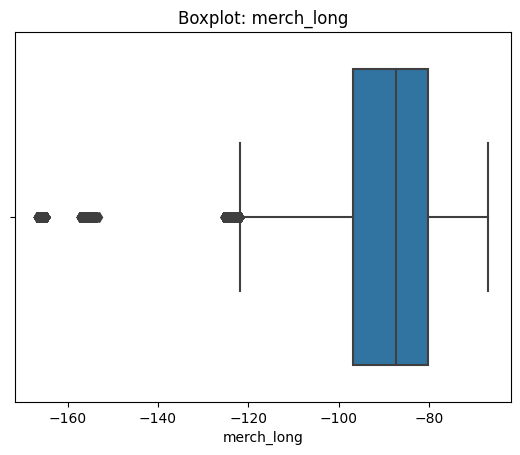

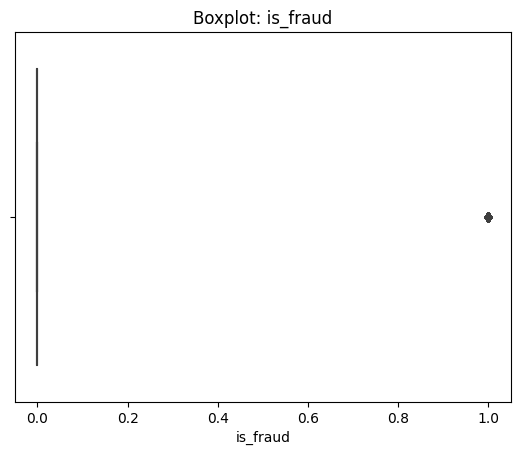

In [52]:
# Boxplots to spot outliers
for c in num_cols:
    plt.figure()
    sns.boxplot(x=cust[c].dropna())
    plt.title(f'Boxplot: {c}')
    plt.show()


**HEATMAP**

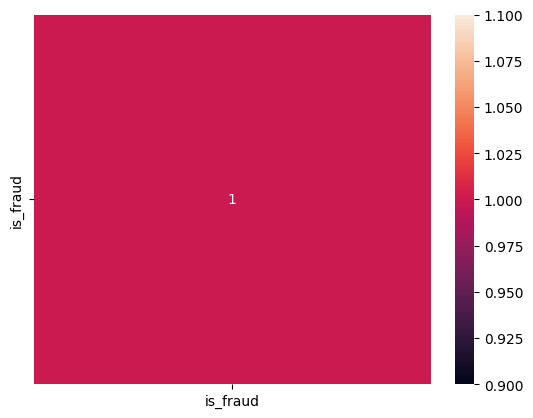

In [53]:
sns.heatmap(df[['is_fraud']].corr(),annot=True)
plt.show()

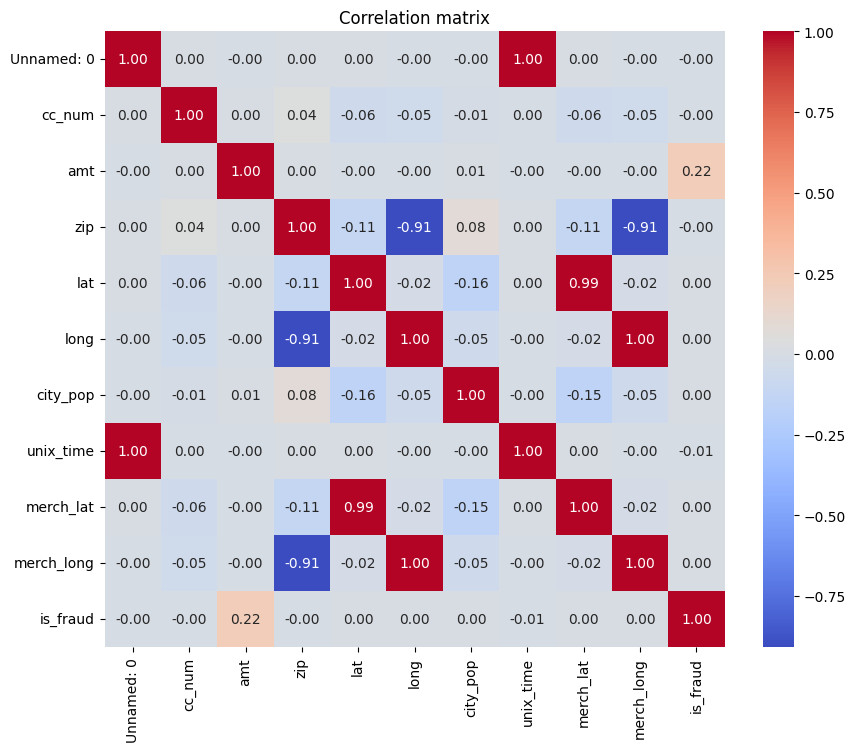

In [54]:
plt.figure(figsize=(10,8))
corr = cust[num_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

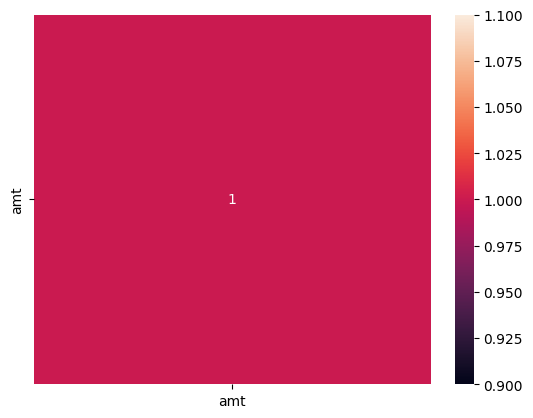

In [55]:
sns.heatmap(df[['amt']].corr(),annot=True)
plt.show()

<Axes: xlabel='category'>

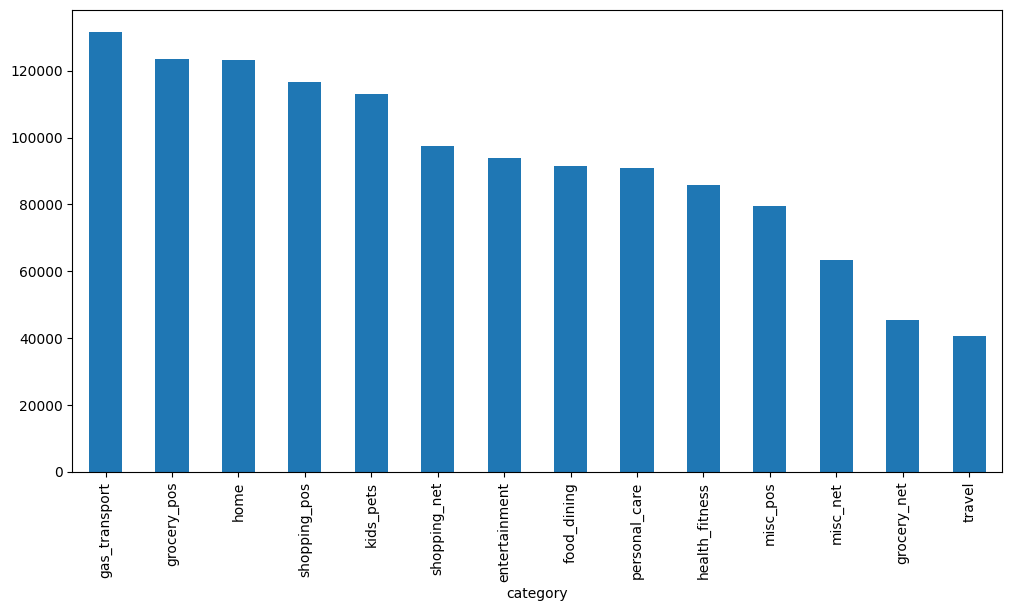

In [56]:
plt.figure(figsize=(12,6))
df['category'].value_counts().plot(kind='bar')

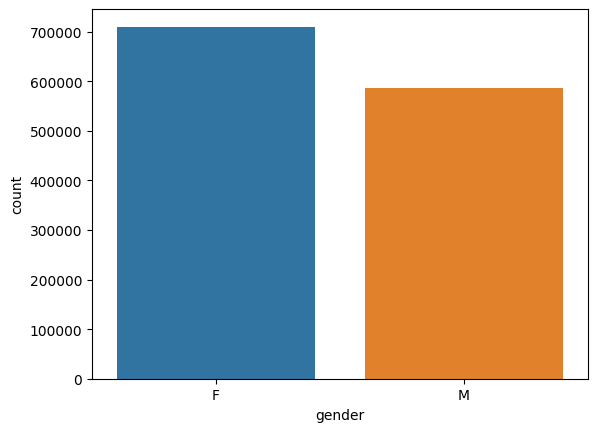

In [57]:
sns.countplot(x='gender',data=df)
plt.show()

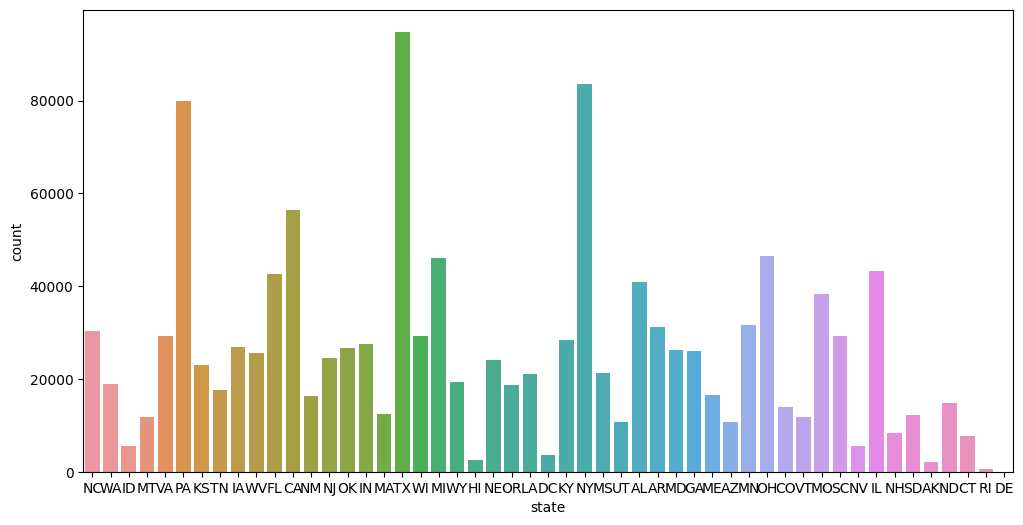

In [58]:
plt.figure(figsize=(12,6))
sns.countplot(x='state',data=df)
plt.show()

<Axes: xlabel='month'>

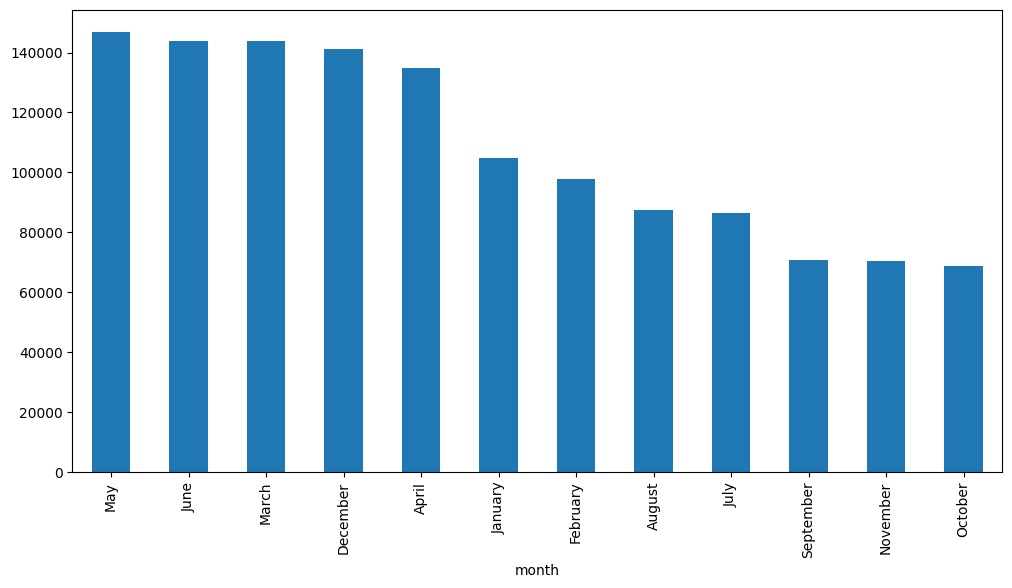

In [59]:
# Month wise Value Counts

plt.figure(figsize=(12,6))
df['month'].value_counts().plot(kind='bar')

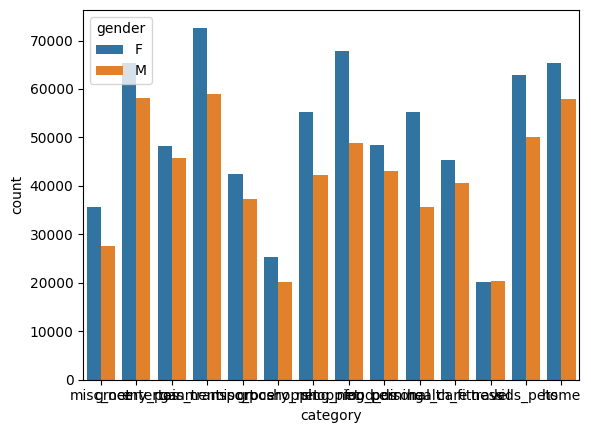

<Figure size 1200x800 with 0 Axes>

In [60]:
# Gender wise category count

sns.countplot(x='category',hue='gender',data=df)
plt.figure(figsize=(12,8))
plt.show()

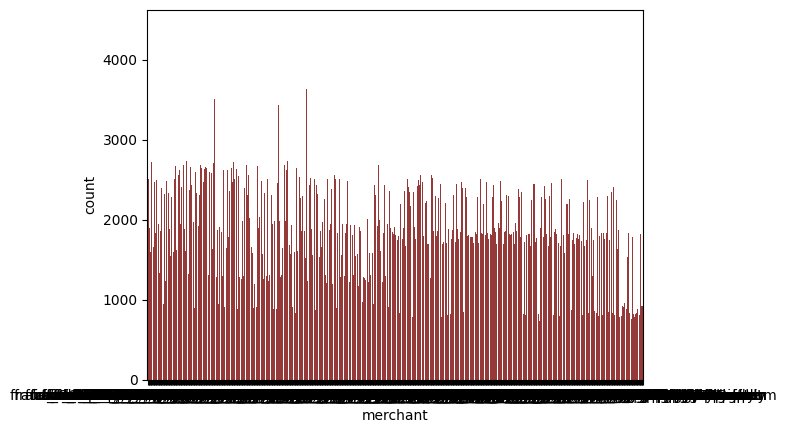

<Figure size 1200x600 with 0 Axes>

In [61]:
# Count of childrens

sns.countplot(x='merchant',data=df , color='brown')
plt.figure(figsize=(12,6))
plt.show()

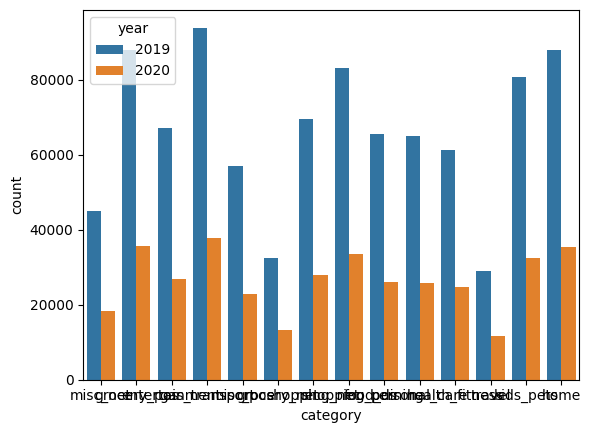

<Figure size 1200x600 with 0 Axes>

In [62]:
# Year wise category count

sns.countplot(x='category',hue='year',data=df)
plt.figure(figsize=(12,6))
plt.show()

# Label Encoder

In [63]:
if 'Gender' in cust.columns:
    le = LabelEncoder()
    cust['Gender_enc'] = le.fit_transform(cust['Gender'].astype(str))

In [64]:
features = ['amt', 'city_pop', 'lat', 'long', 'merch_lat', 'merch_long']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])
X = cust[features].copy()
X.head()

amt  city_pop      lat      long  merch_lat  merch_long
0    4.97      3495  36.0788  -81.1781  36.011293  -82.048315
1  107.23       149  48.8878 -118.2105  49.159047 -118.186462
2  220.11      4154  42.1808 -112.2620  43.150704 -112.154481
3   45.00      1939  46.2306 -112.1138  47.034331 -112.561071
4   41.96        99  38.4207  -79.4629  38.674999  -78.632459

In [65]:
for col in ['amt', 'city_pop', 'lat', 'long', 'merch_lat', 'merch_long']:
    if (X[col] > 0).all():
        X[col] = np.log1p(X[col])

# NORMALIZE / SCALE DATA

In [66]:
from sklearn.preprocessing import LabelEncoder

columns = ['gender', 'category', 'state', 'job', 'city', 'street']
df[columns]=df[columns].apply(LabelEncoder().fit_transform)
df.head()



Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant  category     amt      first     last  \
0          fraud_Rippin, Kub and Mann         8    4.97   Jennifer    Banks   
1     fraud_Heller, Gutmann and Zieme         4  107.23  Stephanie     Gill   
2                fraud_Lind-Buckridge         0  220.11     Edward  Sanchez   
3  fraud_Kutch, Hermiston and Farrell         2   45.00     Jeremy    White   
4                 fraud_Keeling-Crist         9   41.96      Tyler   Garcia   

   gender  street  ...        dob                         trans_num  \
0       0     568  ... 1988-03-09  0b242abb623afc578575680df30655b9   
1       0     435  ... 1978-06-21  1f76529f8574734946361c461b024d99   
2       1     602  ... 1962-01-19  a1a22d70485983eac12b5b88dad1cf95   
3       1     930  ... 1967-01-12  6b849c168bdad6f867558c3793159a81   
4       1     418  ... 1986-03-28  a41d7549acf90789359a9aa5346dcb46   

    unix_time  merch_lat  merch_long  is_fraud        Date    month  year  Age  
0  1325376018  36.011293  -82.048315         0  2019-01-01  January  2019   37  
1  1325376044  49.159047 -118.186462         0  2019-01-01  January  2019   47  
2  1325376051  43.150704 -112.154481         0  2019-01-01  January  2019   63  
3  1325376076  47.034331 -112.561071         0  2019-01-01  January  2019   58  
4  1325376186  38.674999  -78.632459         0  2019-01-01  January  2019   39  

[5 rows x 27 columns]

# KMEANS CLUSTERING

In [67]:
features = ['total_spent', 'avg_amt', 'std_amt', 'txn_count', 'unique_merchants', 'fraud_count', 'avg_city_pop']

X = agg[features].copy()
X = X.fillna(X.median())

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [68]:
print("Available columns:", agg.columns.tolist())
missing = [col for col in features if col not in agg.columns]
print("Missing columns:", missing)


Available columns: ['cc_num', 'total_spent', 'avg_amt', 'std_amt', 'txn_count', 'unique_merchants', 'fraud_count', 'avg_city_pop', 'mean_lat', 'mean_long']
Missing columns: []


In [69]:
features = ['total_spent','avg_amt','std_amt','txn_count','unique_merchants','fraud_count','avg_city_pop']
X = agg[features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [70]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)
agg['cluster'] = labels


In [71]:
cust_id_col = None
for col in ['customerid', 'CustomerID', 'cc_num']:
    if col in df.columns:
        cust_id_col = col
        break

df['cluster'] = df[cust_id_col].map(agg.set_index(cust_id_col)['cluster'])

In [72]:
kmeans.cluster_centers_

array([[ 1.79931314, -0.22918008, -0.24363689,  1.59517981,  0.9426846 ,
         0.45109231, -0.1143724 ],
       [-0.74238037, -0.29129022, -0.43288299, -0.73640916, -0.43200611,
        -1.45357765, -0.21599619],
       [-1.45734867,  3.39540561,  2.15478314, -1.61264803, -2.73570886,
         0.46828939,  0.07492786],
       [-0.90932857, -0.23875753, -0.25032815, -0.99329362, -0.79384652,
         0.52526513, -0.15303894],
       [ 0.65777257, -0.301501  , -0.17284929,  0.8236318 ,  0.73184277,
        -1.42051446, -0.23162066],
       [-0.10462464,  0.88957506,  0.69604786, -0.24483963, -0.63402429,
         0.41717586,  8.22558304],
       [-0.13259202, -0.15945661,  4.77085609, -0.35508539, -0.12949119,
         0.24599375, -0.13521846],
       [ 0.3835138 , -0.29804235, -0.19022508,  0.52216443,  0.64256859,
         0.61344364, -0.20425896],
       [-0.17664699, -0.25821791, -0.10278654, -0.16898152, -0.01922898,
        -0.27896473,  3.13305671],
       [-0.3015484 , -0.2672

In [73]:
centroids_array = kmeans.cluster_centers_
print(centroids_array.shape)


(10, 7)


In [74]:
import pandas as pd

# Centroid array from KMeans
centroids_array = kmeans.cluster_centers_

# Update feature names based on your dataset (must match number of columns)
features = ['total_spent', 'avg_amt', 'std_amt', 'txn_count', 'unique_merchants', 'fraud_count', 'avg_city_pop']

# Convert to DataFrame
centroids_df = pd.DataFrame(centroids_array, columns=features)

centroids_df['cluster'] = range(len(centroids_df))
centroids_df = centroids_df[['cluster'] + features]  # reorder

display(centroids_df)


cluster  total_spent   avg_amt   std_amt  txn_count  unique_merchants  \
0        0     1.799313 -0.229180 -0.243637   1.595180          0.942685   
1        1    -0.742380 -0.291290 -0.432883  -0.736409         -0.432006   
2        2    -1.457349  3.395406  2.154783  -1.612648         -2.735709   
3        3    -0.909329 -0.238758 -0.250328  -0.993294         -0.793847   
4        4     0.657773 -0.301501 -0.172849   0.823632          0.731843   
5        5    -0.104625  0.889575  0.696048  -0.244840         -0.634024   
6        6    -0.132592 -0.159457  4.770856  -0.355085         -0.129491   
7        7     0.383514 -0.298042 -0.190225   0.522164          0.642569   
8        8    -0.176647 -0.258218 -0.102787  -0.168982         -0.019229   
9        9    -0.301548 -0.267273 -0.252551  -0.338032          0.125353   

   fraud_count  avg_city_pop  
0     0.451092     -0.114372  
1    -1.453578     -0.215996  
2     0.468289      0.074928  
3     0.525265     -0.153039  
4    -1.420514     -0.231621  
5     0.417176      8.225583  
6     0.245994     -0.135218  
7     0.613444     -0.204259  
8    -0.278965      3.133057  
9     0.456697     -0.220197

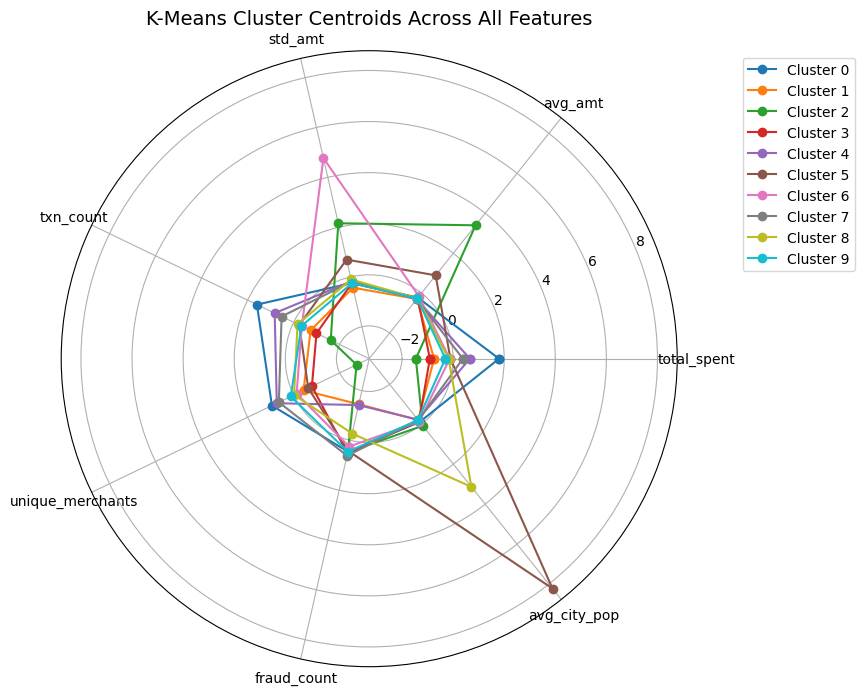

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Number of features
num_features = len(features)
angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
angles += angles[:1]  # complete the loop

plt.figure(figsize=(10,8))

for i, row in centroids_df.iterrows():
    values = row[features].tolist()
    values += values[:1]  # complete the loop for radar
    plt.polar(angles, values, marker='o', label=f'Cluster {int(row["cluster"])}')

# Add feature labels
plt.xticks(angles[:-1], features)
plt.title('K-Means Cluster Centroids Across All Features', fontsize=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()


In [76]:
kmeans.inertia_

1328.8202896119876

In [77]:
# Choose K range
K_range = range(2, 10)   # tests k = 2 to 9
inertias, silhouettes = [], []

# Sampling for faster silhouette
sample_size = min(5000, X_scaled.shape[0])
rng = np.random.default_rng(42)
sample_idx = rng.choice(X_scaled.shape[0], size=sample_size, replace=False)

print("🔍 Running Elbow + Silhouette (with sampling for speed)...\n")
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)

    # Fit model
    labels = km.fit_predict(X_scaled)

    # Store inertia
    inertias.append(km.inertia_)

    # Sampled silhouette score
    try:
        sil = silhouette_score(X_scaled[sample_idx], labels[sample_idx])
    except Exception:
        sil = np.nan
    silhouettes.append(sil)

    print(f" k={k} → inertia={km.inertia_:,.0f} | silhouette={sil:.3f}")

# Best k (max silhouette)
best_k = K_range[np.nanargmax(silhouettes)]
print(f"\n✅ Best K selected = {best_k} (based on highest silhouette score)")



🔍 Running Elbow + Silhouette (with sampling for speed)...

 k=2 → inertia=4,543 | silhouette=0.585
 k=3 → inertia=3,272 | silhouette=0.329
 k=4 → inertia=2,727 | silhouette=0.345
 k=5 → inertia=2,302 | silhouette=0.344
 k=6 → inertia=1,986 | silhouette=0.337
 k=7 → inertia=1,787 | silhouette=0.323
 k=8 → inertia=1,569 | silhouette=0.333
 k=9 → inertia=1,471 | silhouette=0.337

✅ Best K selected = 2 (based on highest silhouette score)


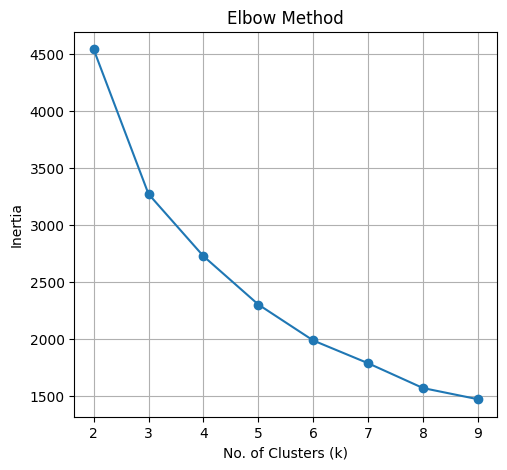

In [78]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(list(K_range), inertias, marker='o')
plt.title("Elbow Method")
plt.xlabel("No. of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)



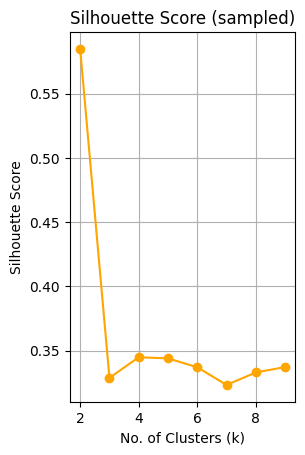

In [79]:
plt.subplot(1,2,2)
plt.plot(list(K_range), silhouettes, marker='o', color='orange')
plt.title("Silhouette Score (sampled)")
plt.xlabel("No. of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [80]:
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=20)
agg_labels = kmeans.fit_predict(X_scaled)
agg['cluster'] = agg_labels
print("KMeans fitted and cluster labels assigned to aggregated customers.")

KMeans fitted and cluster labels assigned to aggregated customers.


In [81]:
cust.shape
X_scaled.shape

(983, 7)

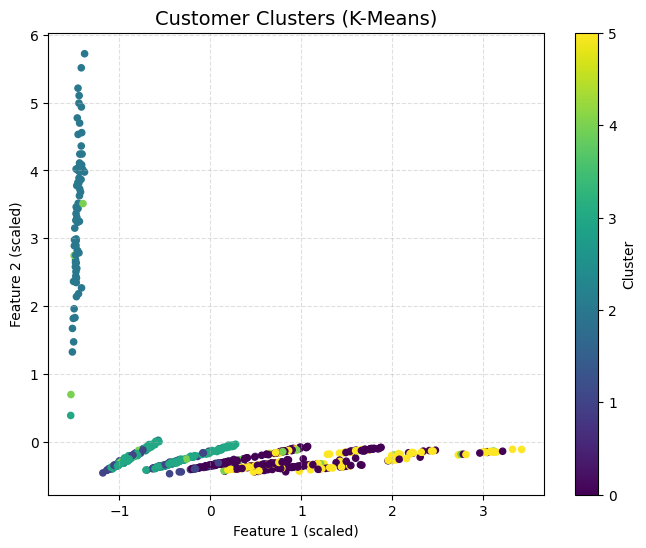

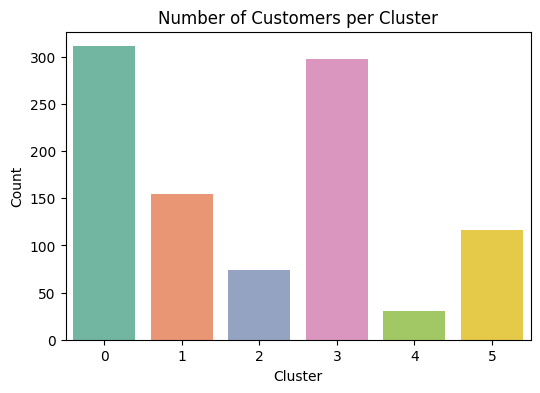

✅ Feature Name Mapping:
Feature1 → total_spent
Feature2 → avg_amt
Feature3 → std_amt
Feature4 → txn_count
Feature5 → unique_merchants
Feature6 → fraud_count
Feature7 → avg_city_pop


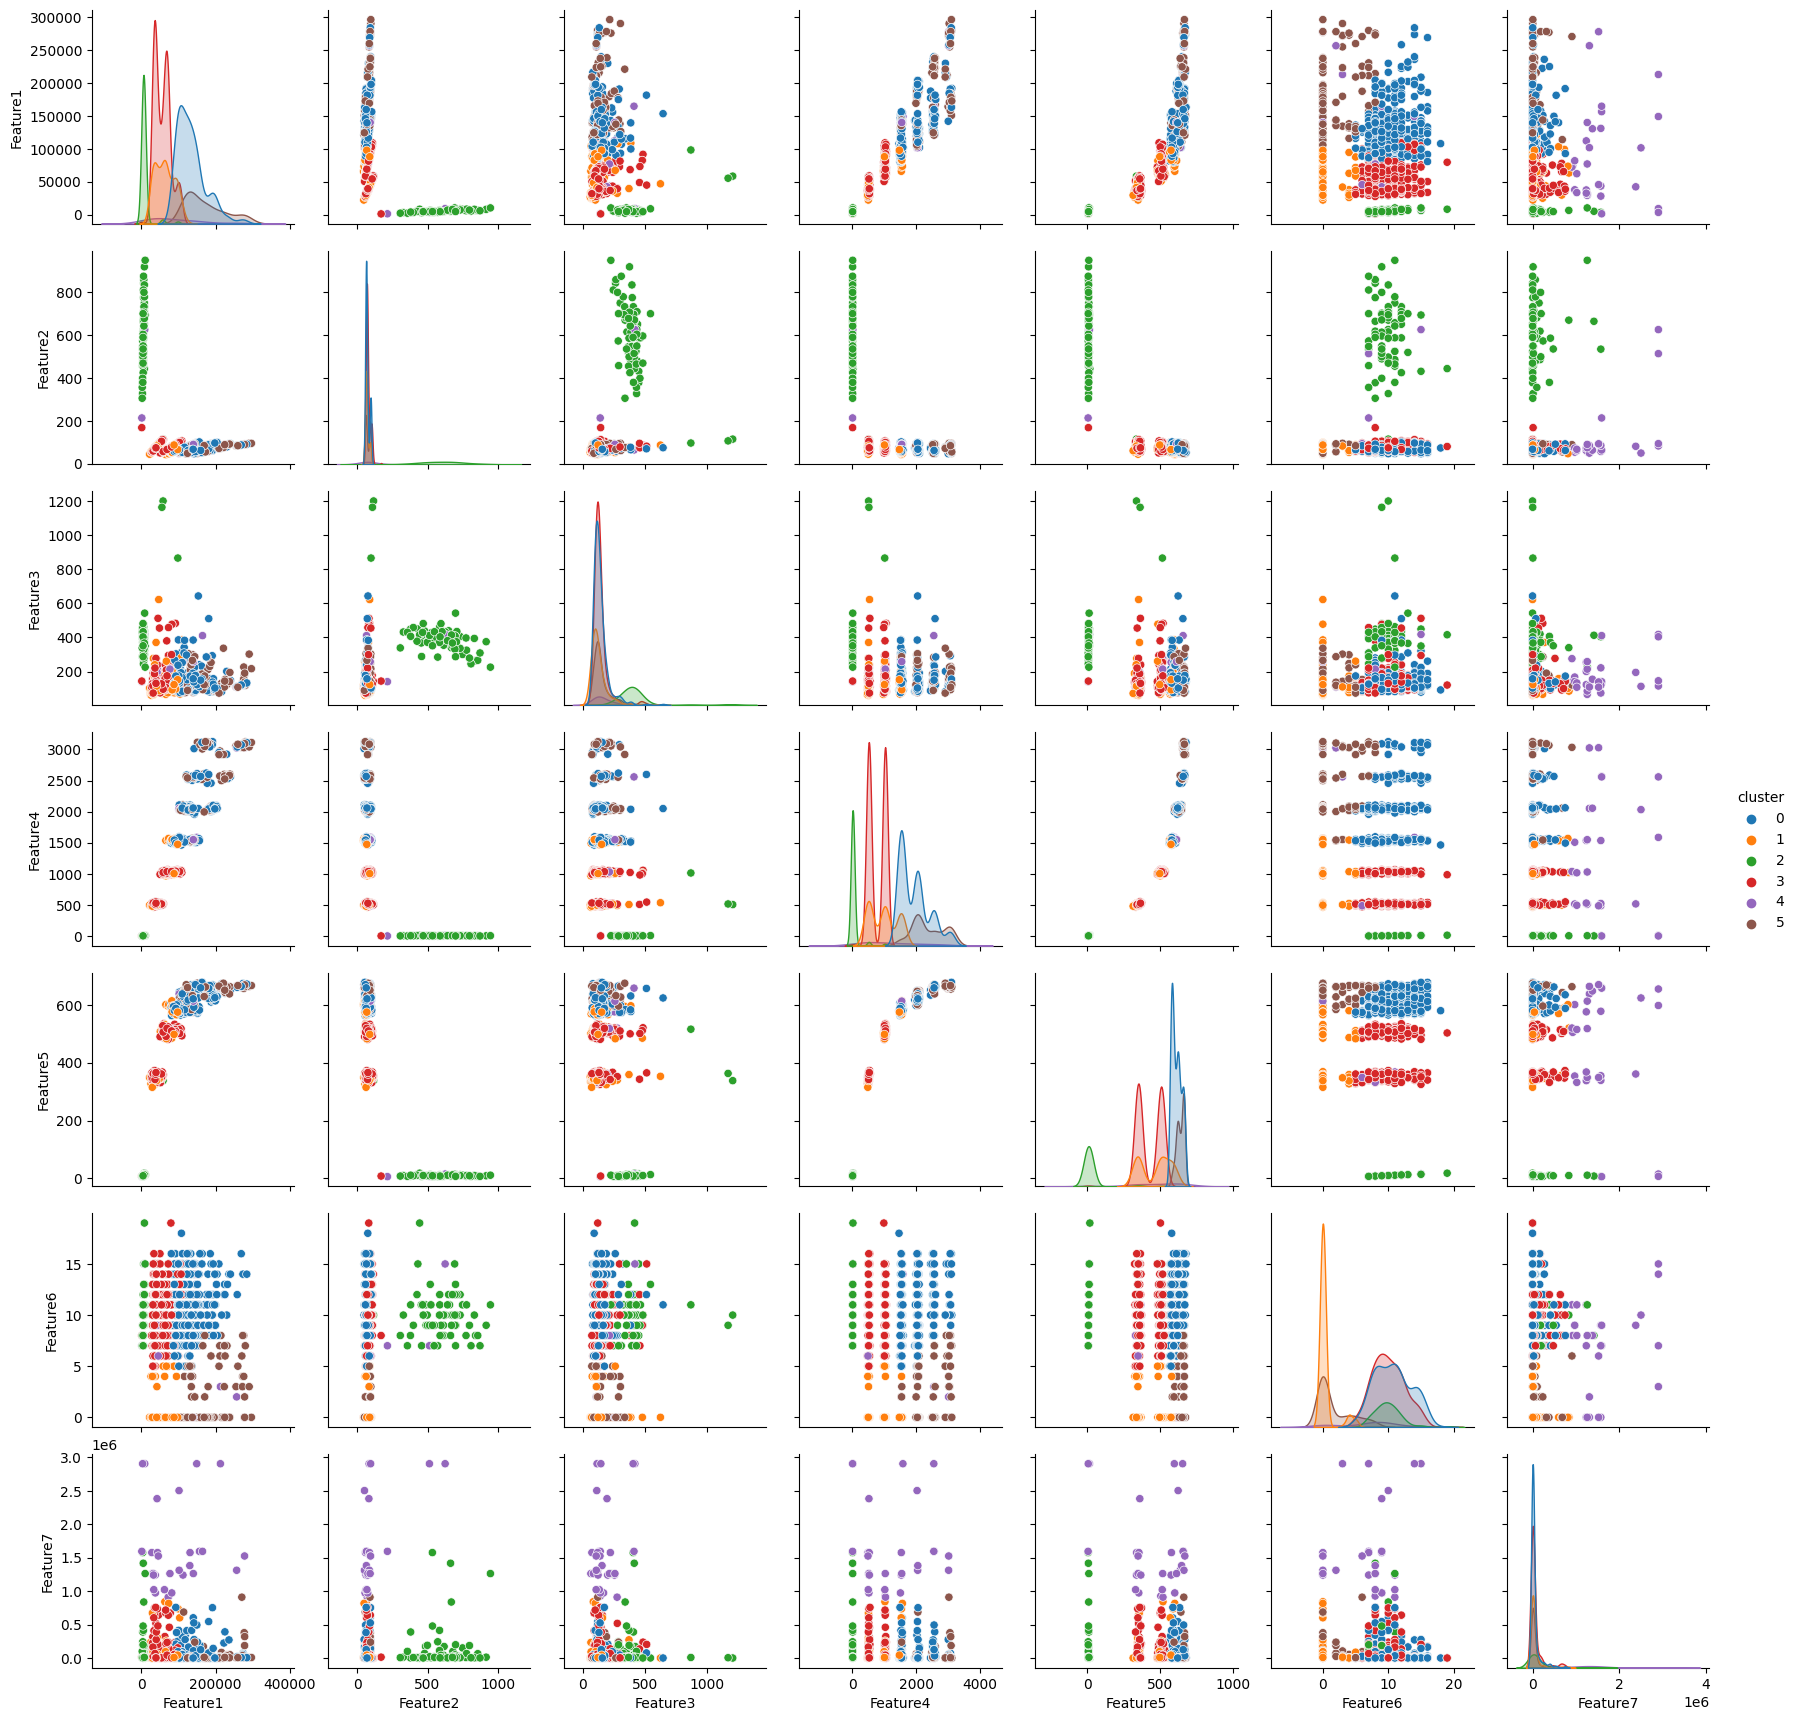

In [82]:
best_k = 6  # after checking elbow/silhouette
km = KMeans(n_clusters=best_k, random_state=42, n_init=20)
agg['cluster'] = km.fit_predict(X_scaled)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=agg['cluster'], s=20)
plt.colorbar(scatter, label='Cluster')
plt.title("Customer Clusters (K-Means)", fontsize=14)
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show
plt.figure(figsize=(6,4))
sns.countplot(x=agg['cluster'], palette='Set2')
plt.title("Number of Customers per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()
import seaborn as sns
import matplotlib.pyplot as plt
# ---- ORIGINAL FEATURE LIST ----
features = ['total_spent','avg_amt','std_amt','txn_count','unique_merchants','fraud_count','avg_city_pop']

# ---- STEP 1: RENAME FEATURES TO Feature1, Feature2, .. ----
feature_map = {col: f"Feature{i+1}" for i, col in enumerate(features)}
renamed_features = list(feature_map.values())

# Keep a copy so you know mapping
print("✅ Feature Name Mapping:")
for old, new in feature_map.items():
    print(f"{new} → {old}")


agg_renamed = agg.copy()
agg_renamed = agg_renamed.rename(columns=feature_map)

sns.pairplot(agg_renamed[renamed_features + ['cluster']], 
             hue='cluster', 
             palette='tab10')
plt.show()





In [83]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

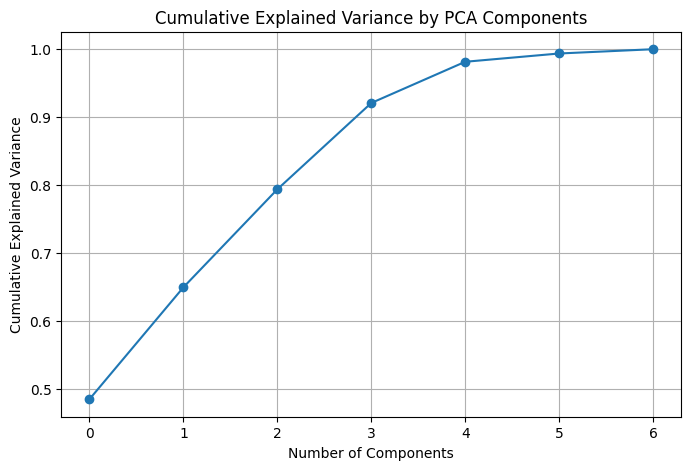

PC1: 0.485
PC2: 0.165
PC3: 0.144
PC4: 0.127
PC5: 0.061
PC6: 0.012
PC7: 0.006


In [84]:
# Explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

for i, v in enumerate(explained_variance, start=1):
    print(f"PC{i}: {v:.3f}")


In [85]:
# Reduce to 2D
pca2 = PCA(n_components=2, random_state=42)
X_pca2 = pca2.fit_transform(X_scaled)

# Add back to your DataFrame
agg_funcs['pca1'] = X_pca2[:,0]
agg_funcs['pca2'] = X_pca2[:,1]



In [86]:
pca3 = PCA(n_components=3, random_state=42)
X_pca3 = pca3.fit_transform(X_scaled)


In [87]:
# Create a DataFrame of loadings
features = ['total_spent','avg_amt','std_amt','txn_count','unique_merchants','fraud_count','avg_city_pop']
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(features))],
    index=features
)

print("PCA Feature Loadings:")
display(loadings.round(3))





PCA Feature Loadings:


PC1    PC2    PC3    PC4    PC5    PC6    PC7
total_spent      -0.459  0.400  0.049 -0.180 -0.234  0.706 -0.201
avg_amt           0.412  0.374  0.037 -0.272 -0.659 -0.316 -0.285
std_amt           0.311  0.542  0.026 -0.399  0.670  0.010 -0.016
txn_count        -0.485  0.342  0.037 -0.164 -0.129 -0.409  0.660
unique_merchants -0.526  0.052 -0.009  0.027  0.209 -0.483 -0.665
fraud_count       0.084  0.491 -0.498  0.710  0.006 -0.002  0.011
avg_city_pop      0.063  0.214  0.864  0.450  0.033 -0.016 -0.005

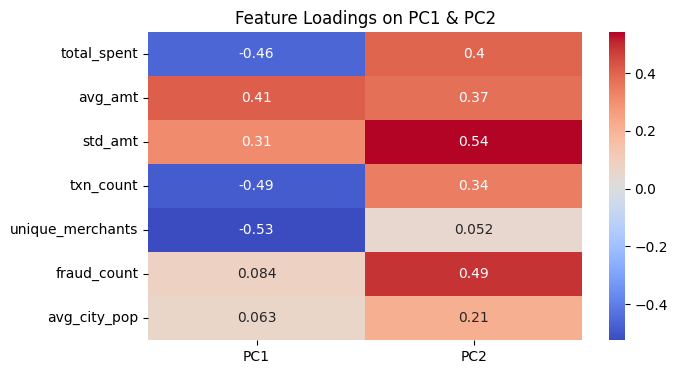

In [88]:
plt.figure(figsize=(7,4))
sns.heatmap(loadings.iloc[:,:2], annot=True, cmap='coolwarm')
plt.title('Feature Loadings on PC1 & PC2')
plt.show()


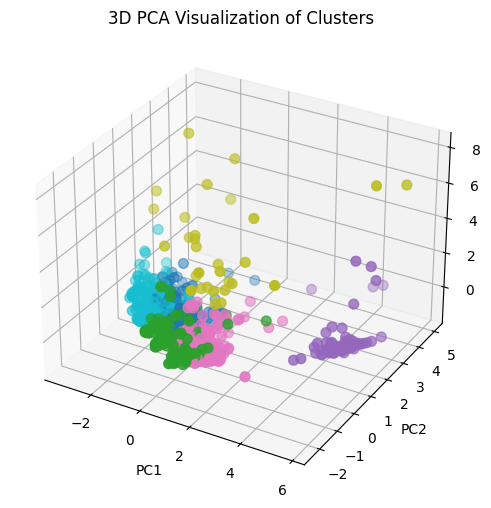

In [89]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca3[:,0], X_pca3[:,1], X_pca3[:,2],
           c=agg['cluster'], cmap='tab10', s=50)
ax.set_xlabel('PC1'); ax.set_ylabel('PC2'); ax.set_zlabel('PC3')
plt.title('3D PCA Visualization of Clusters')
plt.show()


In [90]:
from sklearn.metrics import silhouette_score
sample_idx = np.random.choice(len(X_pca2), size=3000, replace=True)
sil_pca = silhouette_score(X_pca2[sample_idx], agg['cluster'].iloc[sample_idx])
print("Silhouette Score (sampled PCA space):", sil_pca)

Silhouette Score (sampled PCA space): 0.26998160800232784


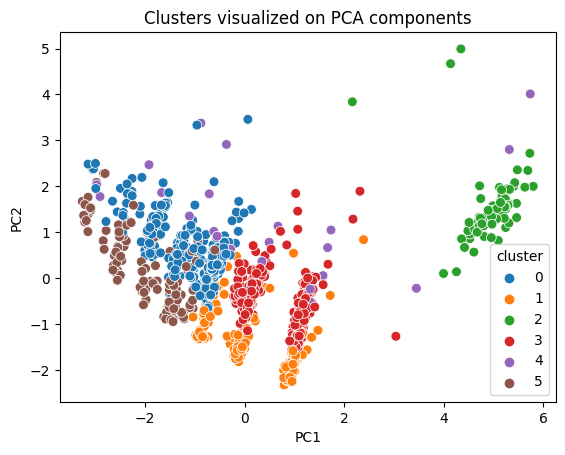

In [91]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
pc = pca.fit_transform(X_scaled)
plt.figure()
sns.scatterplot(x=pc[:,0], y=pc[:,1], hue=agg['cluster'], palette='tab10', s=50)
plt.title('Clusters visualized on PCA components')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.legend(title='cluster')
plt.show()

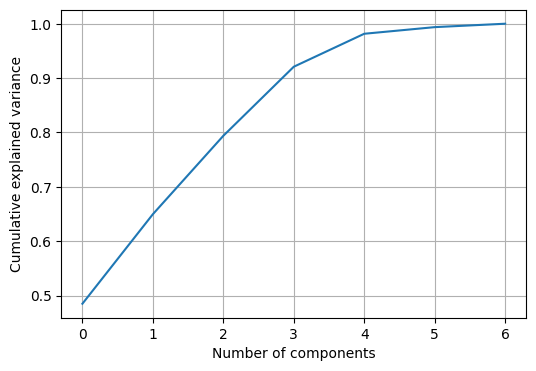

In [92]:
pca_full = PCA().fit(X_scaled)
plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('Number of components'); plt.ylabel('Cumulative explained variance'); plt.grid(); plt.show()


In [93]:
# Remove unwanted index column
agg = agg.drop(columns=["Unnamed: 0"], errors="ignore")

num_cols = agg.select_dtypes(include='number').columns.tolist()

for i, f in enumerate(num_cols):
    groups = agg.groupby("cluster")[f].mean().sort_index()
    print(f"\nAverage {f} per cluster:")
    print(groups)



Average cc_num per cluster:
cluster
0    4.232274e+17
1    3.815182e+17
2    5.436202e+17
3    4.079524e+17
4    2.967975e+17
5    4.358747e+17
Name: cc_num, dtype: float64

Average total_spent per cluster:
cluster
0    133437.266013
1     62831.479026
2      8638.440270
3     56328.818624
4     89458.643667
5    171882.754828
Name: total_spent, dtype: float64

Average avg_amt per cluster:
cluster
0     69.309519
1     66.669216
2    588.131165
3     74.112288
4    109.514728
5     72.351955
Name: avg_amt, dtype: float64

Average std_amt per cluster:
cluster
0    139.074065
1    129.720774
2    412.022552
3    137.893297
4    176.094370
5    140.645640
Name: std_amt, dtype: float64

Average txn_count per cluster:
cluster
0    1939.967846
1     967.597403
2      37.175676
3     767.704698
4    1229.600000
5    2378.620690
Name: txn_count, dtype: float64

Average unique_merchants per cluster:
cluster
0    611.768489
1    466.538961
2     25.797297
3    427.114094
4    458.700000
5    63

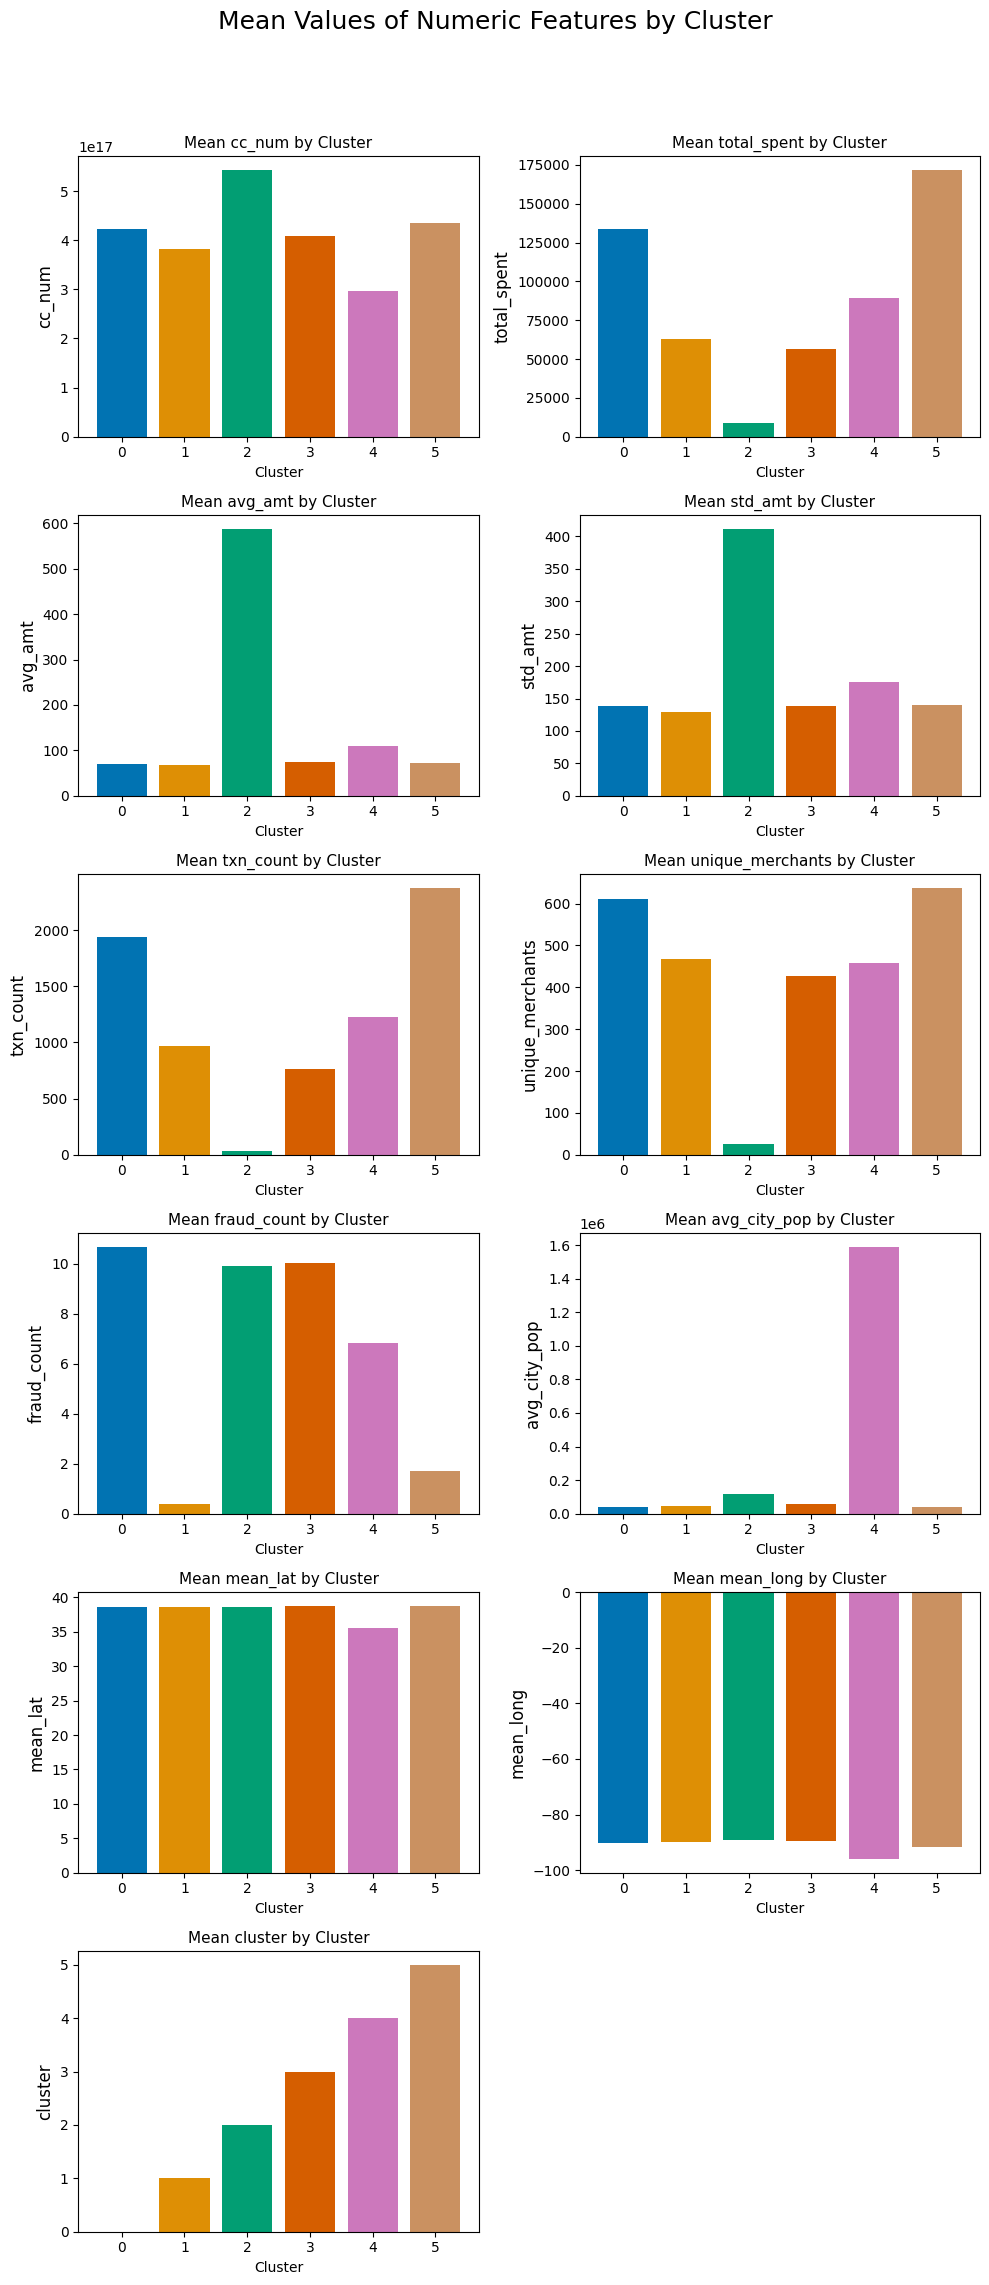

In [94]:
import math
rows = math.ceil(len(num_cols)/2)
fig, axes = plt.subplots(rows, 2, figsize=(10, 4*rows))
axes = axes.flatten()

for i, f in enumerate(num_cols):
    groups = agg.groupby("cluster")[f].mean().sort_index()
    variances = agg.groupby('cluster')[num_cols].mean().var().sort_values(ascending=False)
    numeric_sorted = variances.index[:10]
    axes[i].bar(groups.index, groups, color=sns.color_palette('colorblind'))
    axes[i].set_ylabel(f, fontsize=12)
    axes[i].set_xlabel("Cluster", fontsize=10)
    axes[i].set_xticks(groups.index)
    axes[i].set_title(f"Mean {f} by Cluster", fontsize=11)

# Hide extra axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Mean Values of Numeric Features by Cluster", fontsize=18)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

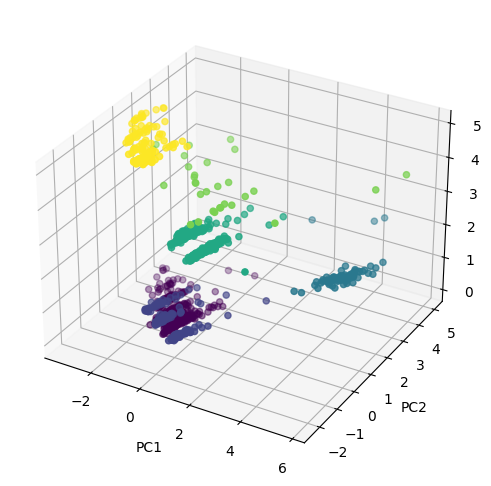

In [95]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pc[:,0], pc[:,1], agg['cluster'], c=agg['cluster'], s=20)
ax.set_xlabel('PC1'); ax.set_ylabel('PC2'); ax.set_zlabel('cluster')
plt.show()

In [96]:
cluster_profile =agg.groupby('cluster')[features].agg(['count','mean','median','std']).T
display(cluster_profile)

# More readable per-cluster summary
summary = agg.groupby('cluster').agg({
    'total_spent': 'sum',
    'avg_amt': 'mean',
    'std_amt': 'std',
    'txn_count': 'mean',
    'unique_merchants': 'mean',
    'fraud_count': 'sum',
    'avg_city_pop': 'mean'
}).round(2)

print(summary)



   

cluster                              0              1              2  \
total_spent      count      311.000000     154.000000      74.000000   
                 mean    133437.266013   62831.479026    8638.440270   
                 median  125572.940000   63008.930000    6080.215000   
                 std      38798.535082   25332.366903   13585.525563   
avg_amt          count      311.000000     154.000000      74.000000   
                 mean        69.309519      66.669216     588.131165   
                 median      64.013967      64.013736     592.672014   
                 std         14.015079      12.265700     172.605682   
std_amt          count      311.000000     154.000000      74.000000   
                 mean       139.074065     129.720774     412.022552   
                 median     122.117471     107.197237     398.451909   
                 std         63.710475      75.557057     152.977218   
txn_count        count      311.000000     154.000000      74.000000   
                 mean      1939.967846     967.597403      37.175676   
                 median    2009.000000    1012.500000      10.000000   
                 std        462.440007     413.680855     141.895713   
unique_merchants count      311.000000     154.000000      74.000000   
                 mean       611.768489     466.538961      25.797297   
                 median     609.000000     501.000000      10.000000   
                 std         31.983127     101.062728      80.243632   
fraud_count      count      311.000000     154.000000      74.000000   
                 mean        10.672026       0.389610       9.918919   
                 median      11.000000       0.000000      10.000000   
                 std          2.805839       1.248851       2.072367   
avg_city_pop     count      311.000000     154.000000      74.000000   
                 mean     40377.241158   45433.402597  118839.378378   
                 median    1858.000000    3276.000000   12597.000000   
                 std     110052.045523  137474.515904  300969.711312   

cluster                              3             4              5  
total_spent      count      298.000000  3.000000e+01     116.000000  
                 mean     56328.818624  8.945864e+04  171882.754828  
                 median   56059.650000  7.349268e+04  158803.930000  
                 std      21277.505014  7.213157e+04   53123.786453  
avg_amt          count      298.000000  3.000000e+01     116.000000  
                 mean        74.112288  1.095147e+02      72.351955  
                 median      69.382142  7.266873e+01      65.199835  
                 std         14.709671  1.291928e+02      15.608275  
std_amt          count      298.000000  3.000000e+01     116.000000  
                 mean       137.893297  1.760944e+02     140.645640  
                 median     123.283358  1.407213e+02     124.544434  
                 std         59.524648  9.570271e+01      56.066802  
txn_count        count      298.000000  3.000000e+01     116.000000  
                 mean       767.704698  1.229600e+03    2378.620690  
                 median     551.000000  1.031500e+03    2087.000000  
                 std        260.324364  9.098364e+02     495.121218  
unique_merchants count      298.000000  3.000000e+01     116.000000  
                 mean       427.114094  4.587000e+02     638.060345  
                 median     369.500000  5.165000e+02     642.500000  
                 std         82.472526  1.975490e+02      25.326147  
fraud_count      count      298.000000  3.000000e+01     116.000000  
                 mean        10.036913  6.833333e+00       1.698276  
                 median      10.000000  8.000000e+00       0.000000  
                 std          2.494839  4.291799e+00       2.561317  
avg_city_pop     count      298.000000  3.000000e+01     116.000000  
                 mean     58326.895973  1.590097e+06   37869.456897  
                 medi

         total_spent  avg_amt  std_amt  txn_count  unique_merchants  \
cluster                                                               
0        41498989.73    69.31    63.71    1939.97            611.77   
1         9676047.77    66.67    75.56     967.60            466.54   
2          639244.58   588.13   152.98      37.18             25.80   
3        16785987.95    74.11    59.52     767.70            427.11   
4         2683759.31   109.51    95.70    1229.60            458.70   
5        19938399.56    72.35    56.07    2378.62            638.06   

         fraud_count  avg_city_pop  
cluster                             
0               3319      40377.24  
1                 60      45433.40  
2                734     118839.38  
3               2991      58326.90  
4                205    1590096.93  
5                197      37869.46  


In [97]:
agg.to_csv('/kaggle/working/customer_segments_week2.csv', index=False)
print("Saved: /kaggle/working/customer_segments_week2.csv")

Saved: /kaggle/working/customer_segments_week2.csv


total_spent                  avg_amt               std_amt          \
               mean     median count    mean  median count    mean  median   
cluster                                                                      
0         133437.27  125572.94   311   69.31   64.01   311  139.07  122.12   
1          62831.48   63008.93   154   66.67   64.01   154  129.72  107.20   
2           8638.44    6080.22    74  588.13  592.67    74  412.02  398.45   
3          56328.82   56059.65   298   74.11   69.38   298  137.89  123.28   
4          89458.64   73492.68    30  109.51   72.67    30  176.09  140.72   
5         171882.75  158803.93   116   72.35   65.20   116  140.65  124.54   

              txn_count  ...       unique_merchants              fraud_count  \
        count      mean  ... count             mean median count        mean   
cluster                  ...                                                   
0         311   1939.97  ...   311           611.77  609.0   311       10.67   
1         154    967.60  ...   154           466.54  501.0   154        0.39   
2          74     37.18  ...    74            25.80   10.0    74        9.92   
3         298    767.70  ...   298           427.11  369.5   298       10.04   
4          30   1229.60  ...    30           458.70  516.5    30        6.83   
5         116   2378.62  ...   116           638.06  642.5   116        1.70   

                     avg_city_pop                   
        median count         mean     median count  
cluster                                             
0         11.0   311     40377.24     1858.0   311  
1          0.0   154     45433.40     3276.0   154  
2         10.0    74    118839.38    12597.0    74  
3         10.0   298     58326.90     2518.0   298  
4          8.0    30   1590096.93  1347701.0    30  
5          0.0   116     37869.46     2510.0   116  

[6 rows x 21 columns]

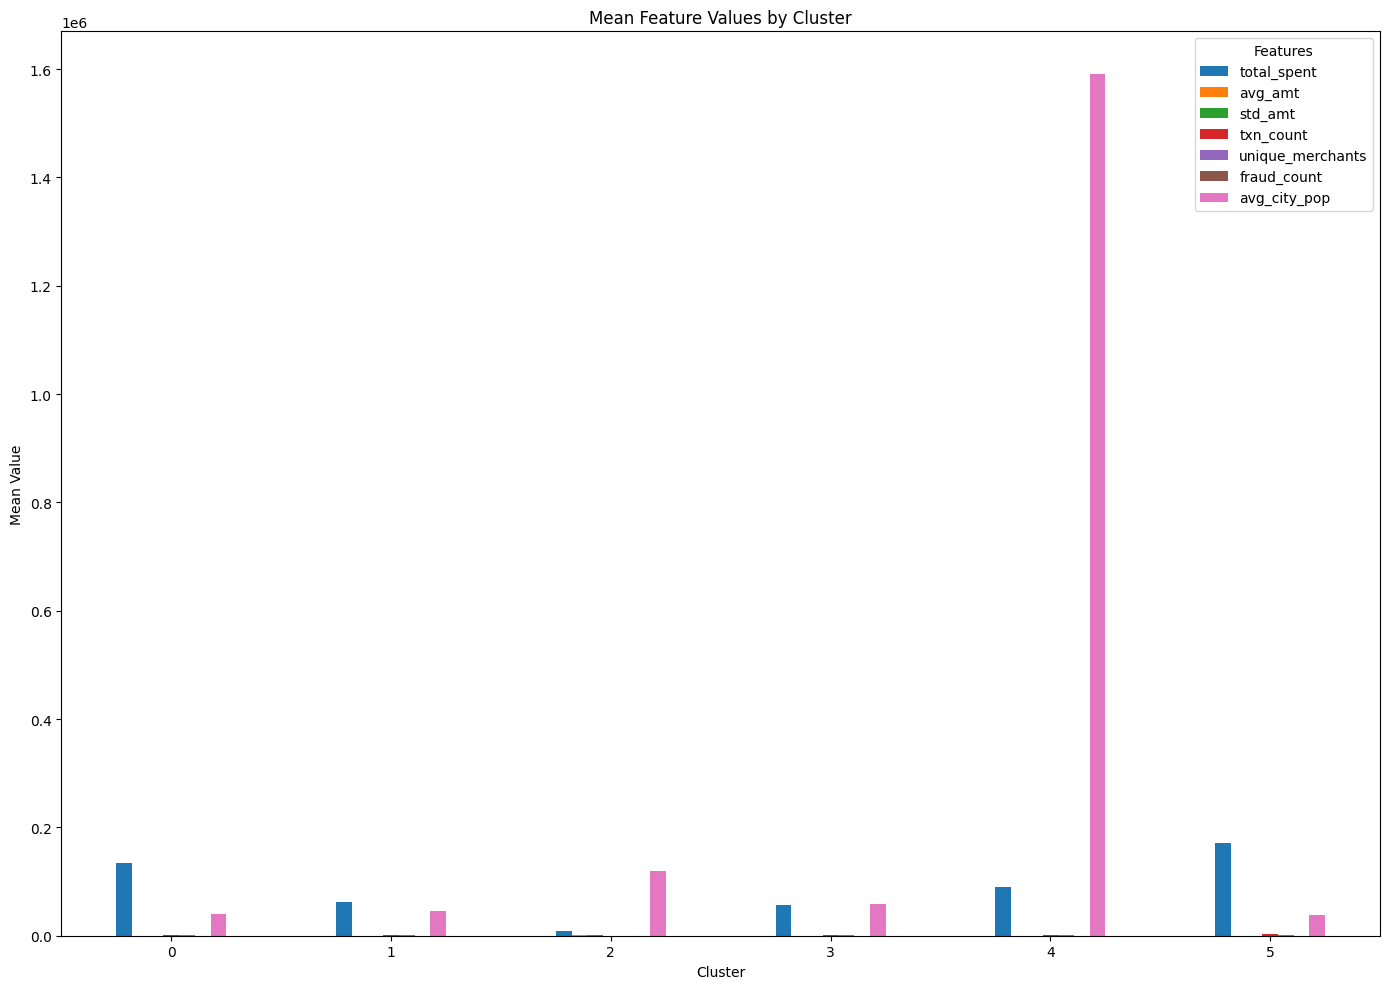

In [98]:
import matplotlib.pyplot as plt

# If you renamed your columns, make sure features list matches the new names
features = ['total_spent','avg_amt','std_amt','txn_count','unique_merchants','fraud_count','avg_city_pop']

# Cluster profile per customer
cluster_profile = agg.groupby('cluster')[features].agg(['mean','median','count']).round(2)
display(cluster_profile)

# Compute cluster-wise mean for plotting
cluster_means = agg.groupby('cluster')[features].mean().reset_index()

# Single grouped bar chart
cluster_means.set_index('cluster').plot(
    kind='bar', 
    figsize=(14,10)
)
plt.title('Mean Feature Values by Cluster')
plt.ylabel('Mean Value')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.legend(title='Features')
plt.tight_layout()
plt.show()



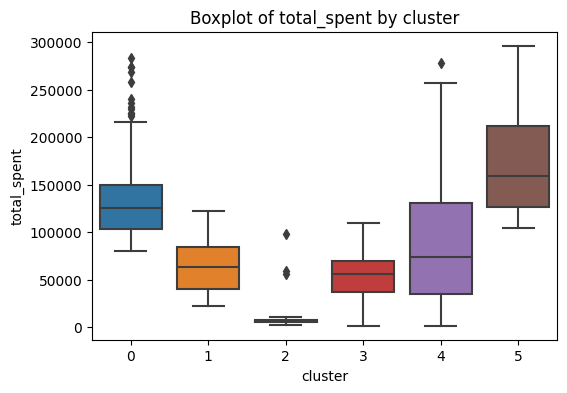

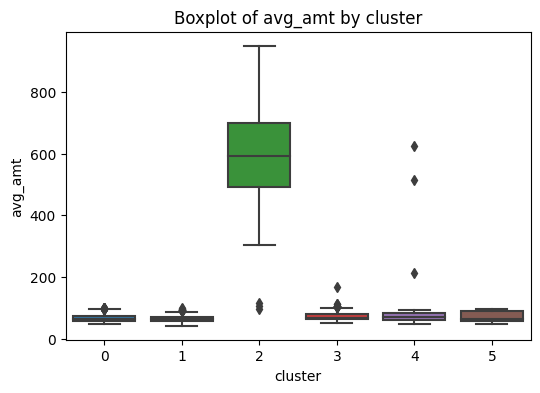

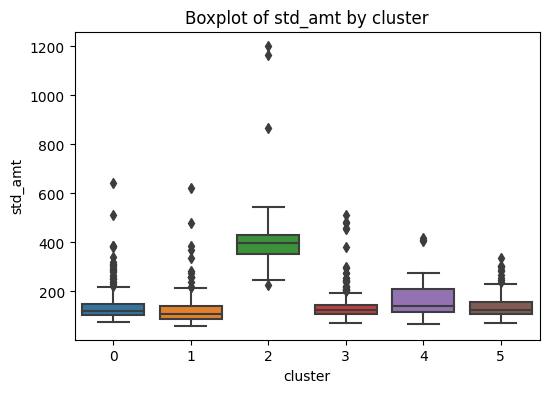

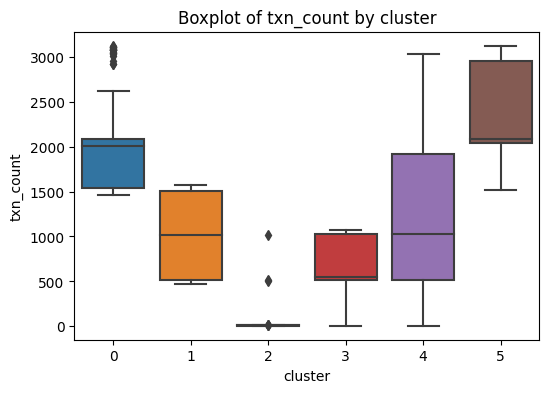

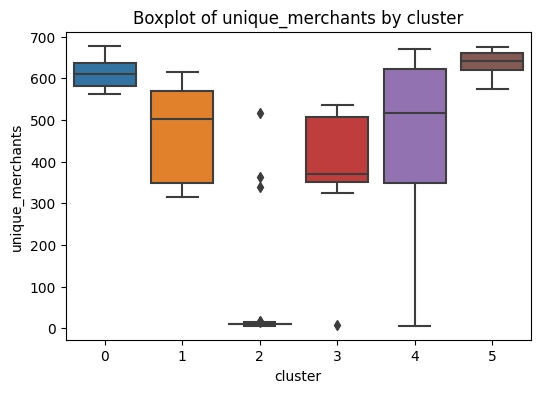

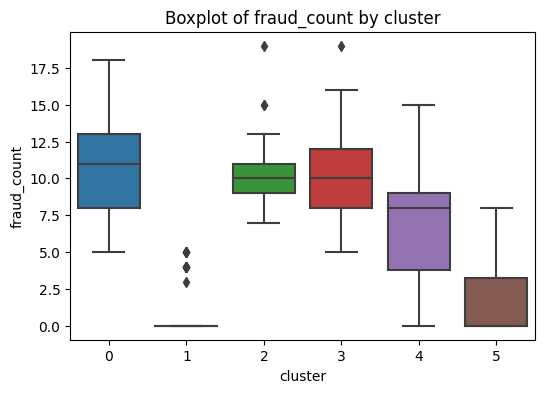

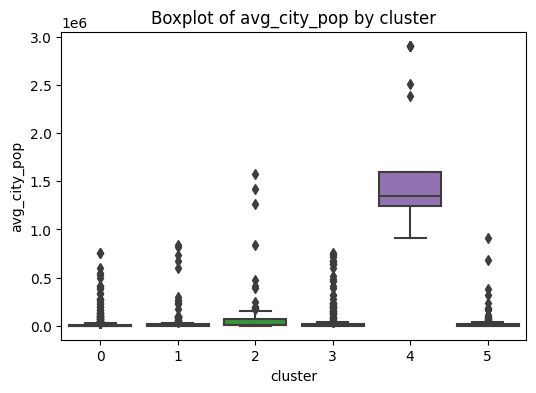

In [99]:
import seaborn as sns
for f in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='cluster', y=f, data=agg)
    plt.title(f'Boxplot of {f} by cluster')
    plt.show()


In [100]:
# Refit KMeans multiple times
centers = []
for seed in [0, 10, 42, 99]:
    km = KMeans(n_clusters=best_k, random_state=seed, n_init=20).fit(X_scaled)
    centers.append(np.round(km.cluster_centers_,3))
centers  # inspect similarity


[array([[ 0.682, -0.284, -0.192,  0.765,  0.713,  0.624, -0.183],
        [-0.612, -0.252, -0.203, -0.679, -0.345,  0.493, -0.128],
        [ 1.311, -0.264, -0.141,  1.287,  0.859, -1.226, -0.193],
        [-1.413,  3.256,  2.425, -1.579, -2.644,  0.469,  0.06 ],
        [-0.056, -0.01 ,  0.163, -0.11 , -0.164, -0.165,  4.621],
        [-0.514, -0.303, -0.311, -0.442, -0.129, -1.487, -0.166]]),
 array([[ 0.683, -0.284, -0.188,  0.762,  0.712,  0.634, -0.183],
        [-1.413,  3.256,  2.425, -1.579, -2.644,  0.469,  0.06 ],
        [-0.514, -0.303, -0.311, -0.442, -0.129, -1.487, -0.166],
        [ 1.294, -0.266, -0.152,  1.282,  0.858, -1.205, -0.193],
        [-0.612, -0.252, -0.203, -0.679, -0.345,  0.493, -0.128],
        [-0.056, -0.01 ,  0.163, -0.11 , -0.164, -0.165,  4.621]]),
 array([[ 0.682, -0.284, -0.192,  0.765,  0.713,  0.624, -0.183],
        [-0.503, -0.303, -0.282, -0.433, -0.119, -1.489, -0.168],
        [-1.413,  3.256,  2.425, -1.579, -2.644,  0.469,  0.06 ],
      

✅ Customer segments saved to /kaggle/working/customer_segments.csv


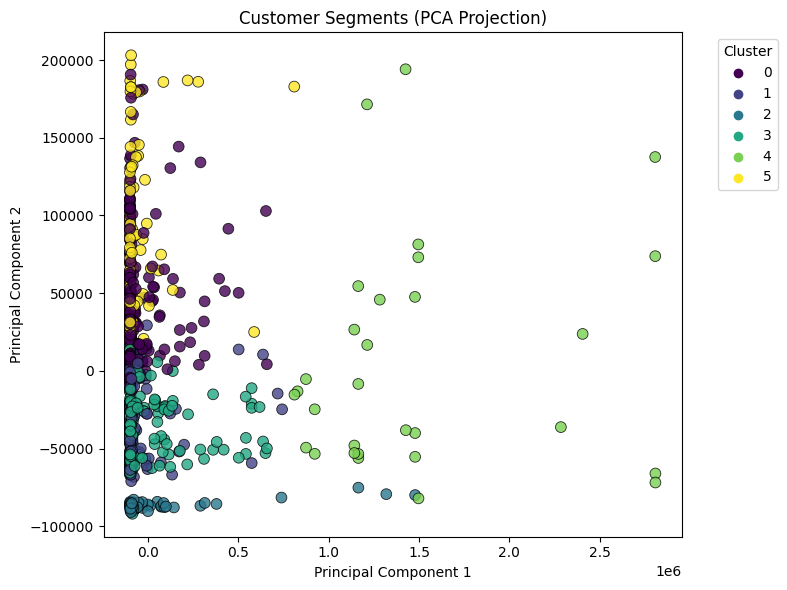

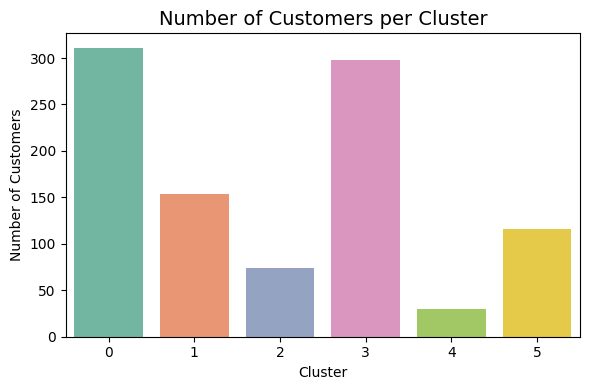

✅ PCA scatter plot saved to /kaggle/working/cluster_pca.png


In [101]:
# Choose the numeric features for PCA
features = ['total_spent','avg_amt','std_amt','txn_count','unique_merchants','fraud_count','avg_city_pop']

#  Run PCA on the feature data
pca = PCA(n_components=2)
pca_components = pca.fit_transform(agg[features])

# Add PCA results back into your dataframe
agg['pca1'] = pca_components[:, 0]
agg['pca2'] = pca_components[:, 1]

# Save your clustered data safely
cust.to_csv('/kaggle/working/customer_segments.csv', index=False)
print("✅ Customer segments saved to /kaggle/working/customer_segments.csv")

# Plot PCA projection
plt.figure(figsize=(8,6))
sns.scatterplot( x='pca1',  y='pca2', hue='cluster',  data=agg,  palette='viridis',  s=60,  edgecolor='k',  alpha=0.8 )
plt.title('Customer Segments (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('/kaggle/working/cluster_pca.png', dpi=300, bbox_inches='tight')
plt.show()
cluster_counts = agg['cluster'].value_counts().sort_index()
plt.figure(figsize=(6,4))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='Set2')
plt.title("Number of Customers per Cluster", fontsize=14)
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()
print("✅ PCA scatter plot saved to /kaggle/working/cluster_pca.png")



   cluster  count  percent
0        0    311    31.64
1        1    154    15.67
2        2     74     7.53
3        3    298    30.32
4        4     30     3.05
5        5    116    11.80


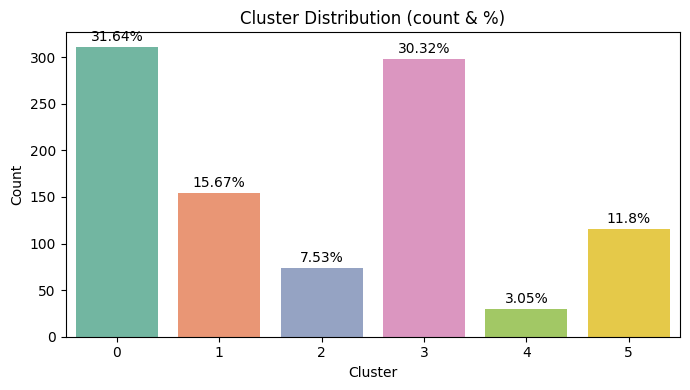

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute counts and percents
cluster_counts = agg['cluster'].value_counts().sort_index()
cluster_percent = (cluster_counts / cluster_counts.sum() * 100).round(2)
cluster_dist = pd.DataFrame({
    'cluster': cluster_counts.index,
    'count': cluster_counts.values,
    'percent': cluster_percent.values
}).reset_index(drop=True)

print(cluster_dist)

# Plot with percentages on bars
plt.figure(figsize=(7,4))
ax = sns.barplot(x='cluster', y='count', data=cluster_dist, palette='Set2')
for i, row in cluster_dist.iterrows():
    ax.text(i, row['count'] + cluster_counts.max()*0.01, f"{row['percent']}%", 
            ha='center', va='bottom', fontsize=10)
plt.title("Cluster Distribution (count & %)")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

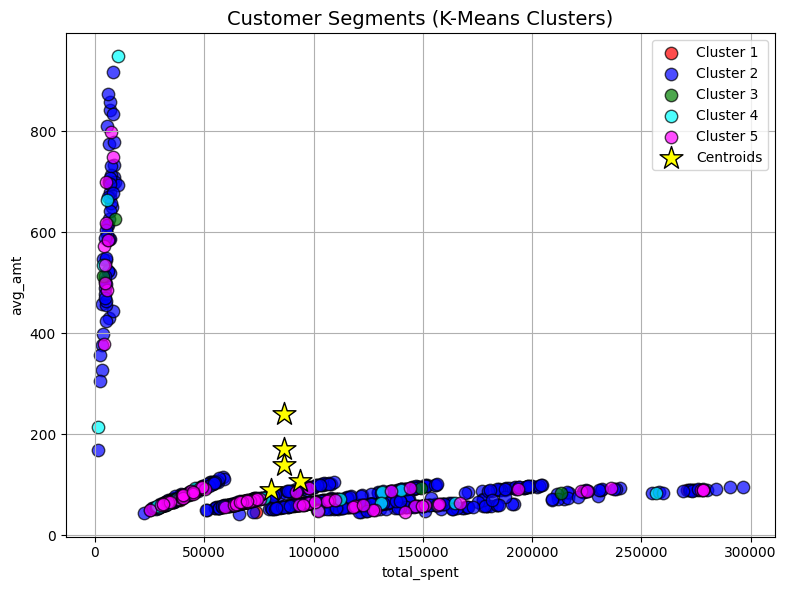

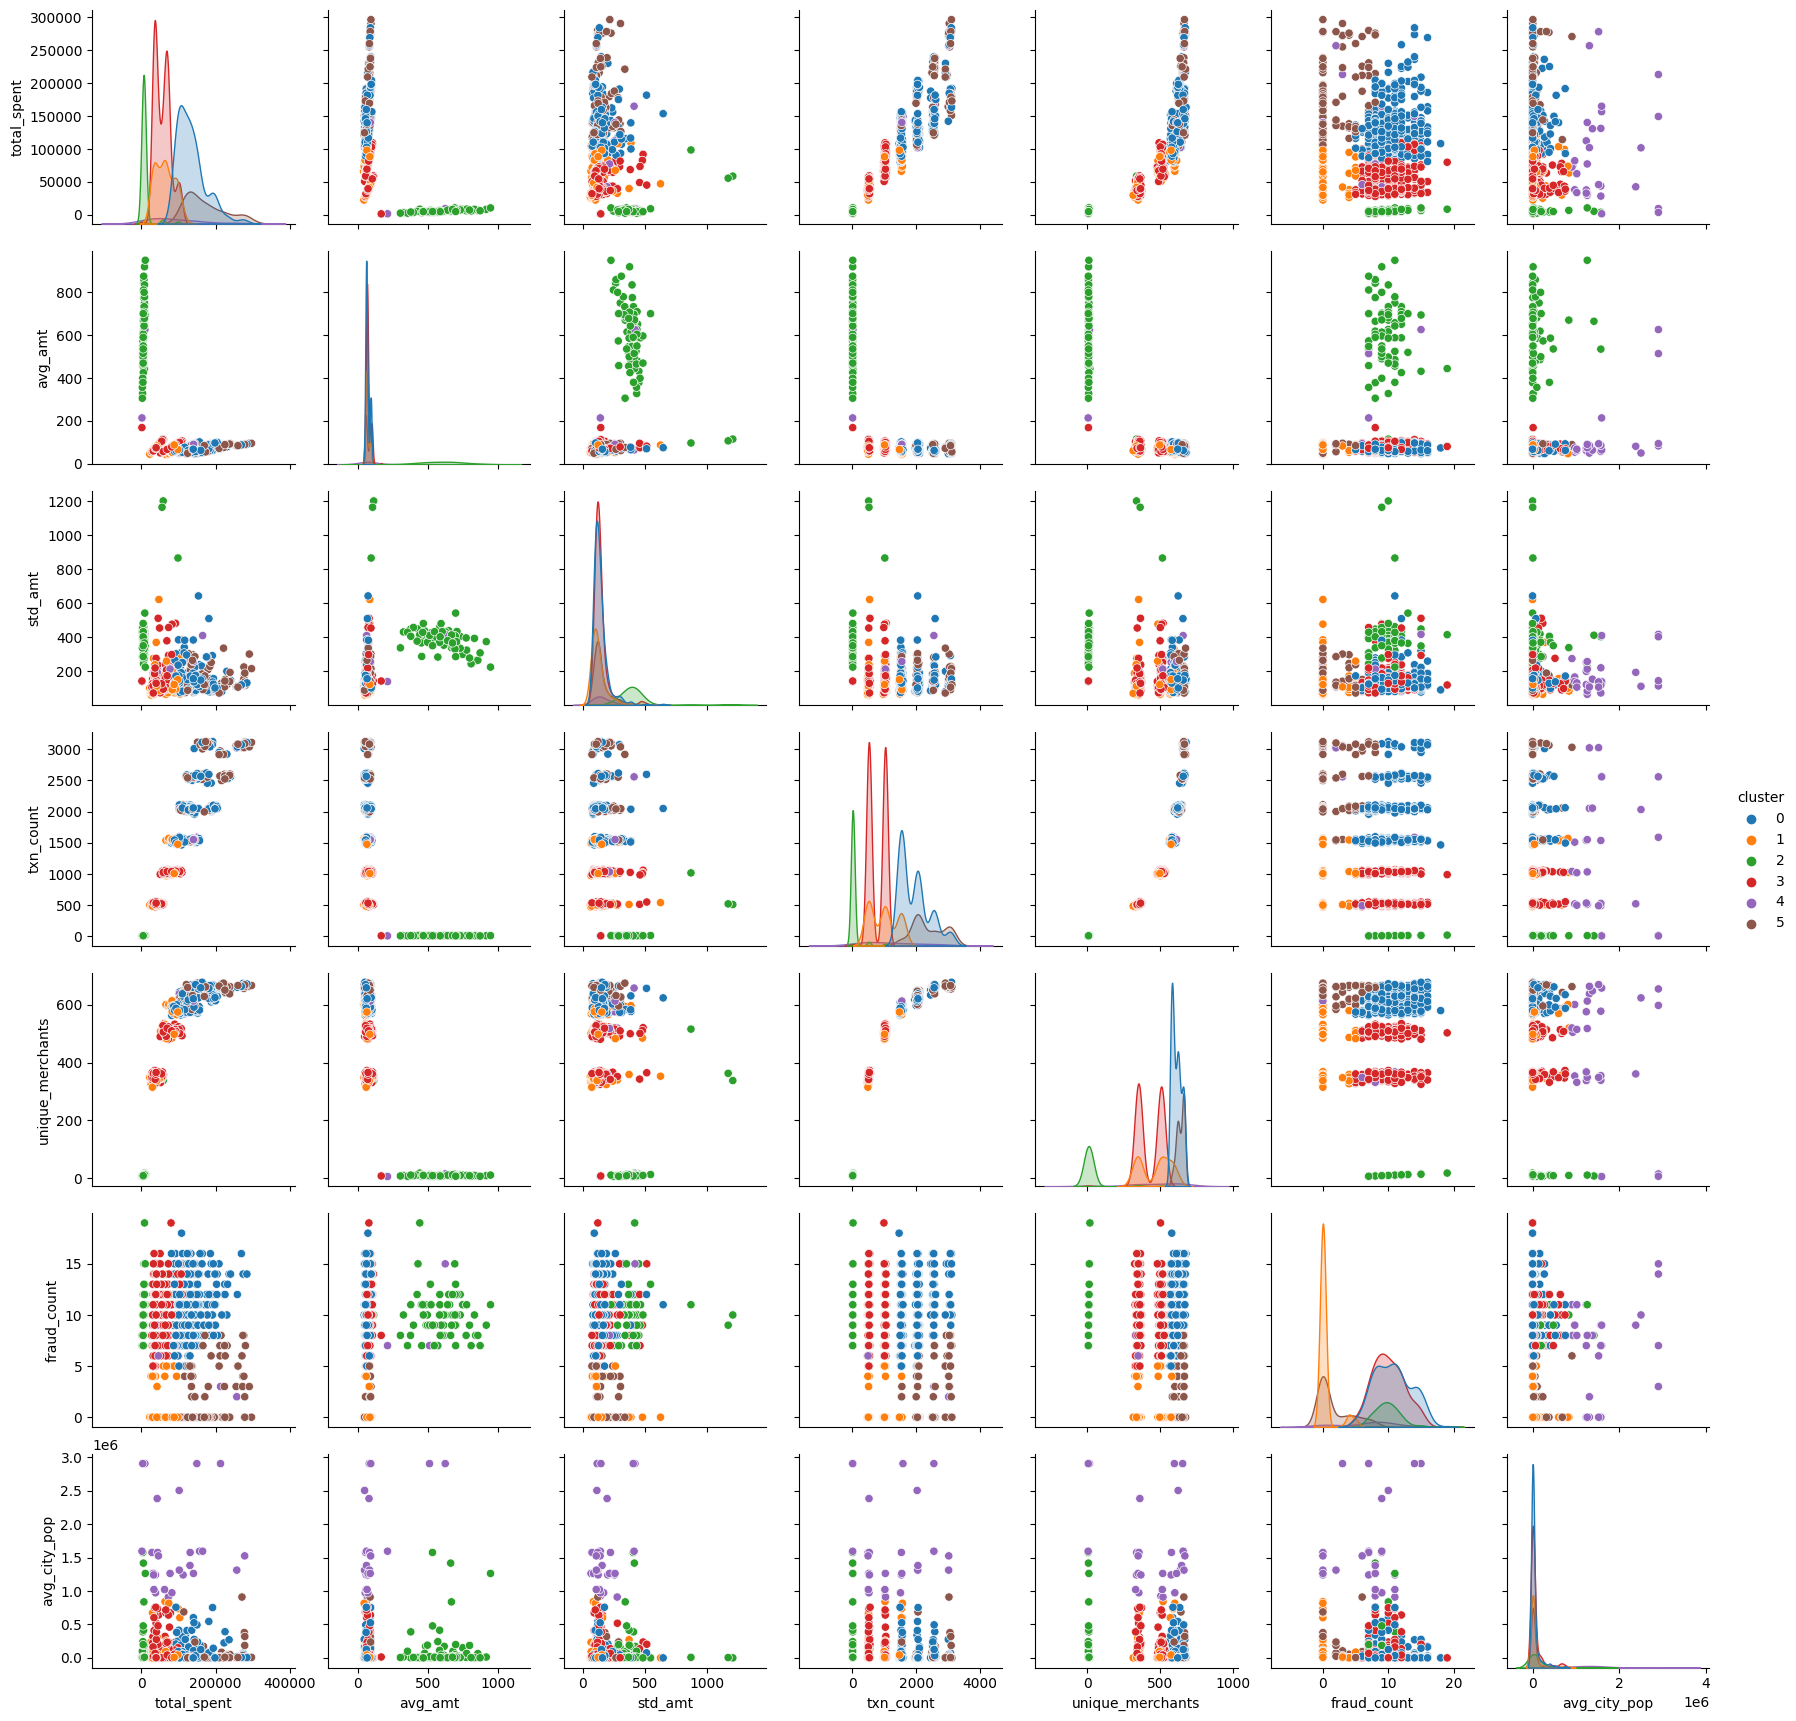

In [103]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Example: Assuming you have your DataFrame 'df' with 2 features
features = ['total_spent','avg_amt','std_amt','txn_count','unique_merchants','fraud_count','avg_city_pop']
X = agg[features].values  # 2D feature matrix

# Fit K-Means (example with 5 clusters)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=20)
y_kmeans = kmeans.fit_predict(X)

# Plot clusters
unique_clusters = sorted(set(y_kmeans))
colors = ['red', 'blue', 'green', 'cyan', 'magenta', 'orange', 'purple', 'brown', 'gray']

plt.figure(figsize=(8,6))

for i, cluster in enumerate(unique_clusters):
    plt.scatter(
        X[y_kmeans == cluster, 0],
        X[y_kmeans == cluster, 1],
        s=80,
        c=colors[i % len(colors)],
        label=f'Cluster {cluster + 1}',
        alpha=0.7,
        edgecolor='k'
    )

plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=300,
    c='yellow',
    edgecolor='black',
    marker='*',
    label='Centroids'
)

plt.title('Customer Segments (K-Means Clusters)', fontsize=14)
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
sns.pairplot(agg[features + ['cluster']], hue='cluster', palette='tab10')
plt.show()


Silhouette Score: 0.338


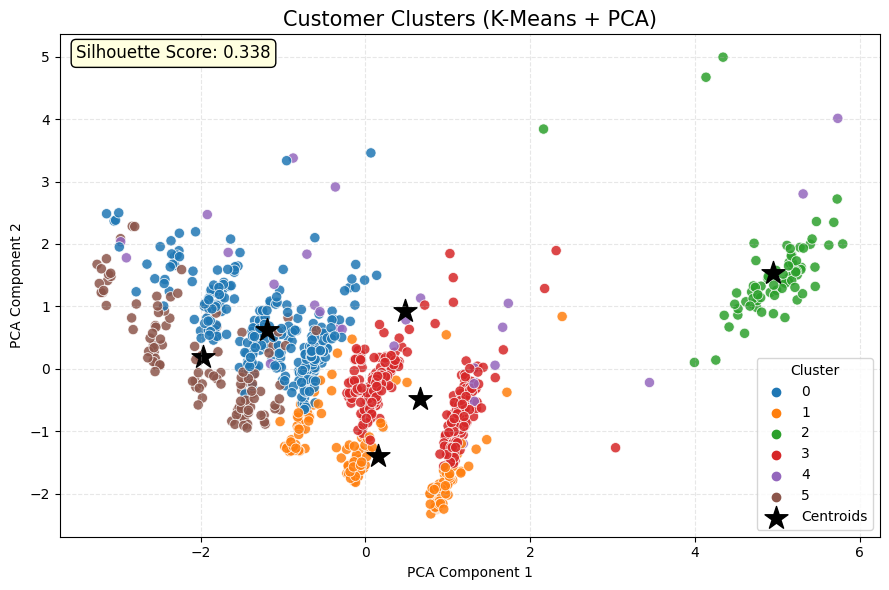

In [104]:

best_k = 6  # after model selection

# Fit K-Means
km = KMeans(n_clusters=best_k, random_state=42, n_init=20)
agg['cluster'] = km.fit_predict(X_scaled)

# Calculate Silhouette Score
sil_score = silhouette_score(X_scaled, agg['cluster'])
print("Silhouette Score:", round(sil_score, 3))

# PCA for 2D visualization
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(X_scaled)
agg['pca1'] = pca_2d[:, 0]
agg['pca2'] = pca_2d[:, 1]

# Plot
plt.figure(figsize=(9,6))
sns.scatterplot(
    data=agg, x='pca1', y='pca2', 
    hue='cluster', palette='tab10', s=55, alpha=0.85
)

# Plot centroids in PCA space
centroids = pca.transform(km.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], 
            s=300, c='black', marker='*', label='Centroids')

# Add Silhouette Score as annotation
plt.text(
    0.02, 0.98, 
    f"Silhouette Score: {sil_score:.3f}", 
    transform=plt.gca().transAxes,
    fontsize=12, 
    verticalalignment='top',
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightyellow")
)

plt.title("Customer Clusters (K-Means + PCA)", fontsize=15)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [105]:
import joblib

joblib.dump(kmeans, "kmeans_model.pkl")
joblib.dump(scaler, "scaler.pkl")
df.to_csv("clustered_customers.csv", index=False)

In [106]:
# Create the customer-level DF that matches X_scaled
df_cust = df.drop_duplicates(subset='cc_num').copy()

# Reset index
df_cust = df_cust.reset_index(drop=True)

print(df_cust.shape)   # This should show (983, ...)


(983, 28)


In [107]:
print("df_cust rows:", df_cust.shape[0])
print("X_scaled rows:", X_scaled.shape[0])


df_cust rows: 983
X_scaled rows: 983


In [108]:
print(len(X_scaled), len(labels))


983 983


In [109]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

print("\n📊 Cluster Evaluation Metrics:")
print("Silhouette Score:", silhouette_score(X_scaled, labels))
print("Davies-Bouldin Score:", davies_bouldin_score(X_scaled, labels))
print("Calinski-Harabasz Score:", calinski_harabasz_score(X_scaled, labels))




📊 Cluster Evaluation Metrics:
Silhouette Score: 0.3373396589377698
Davies-Bouldin Score: 0.925904542876922
Calinski-Harabasz Score: 447.85935398110195


In [110]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

### 1. BUILD CUSTOMER-LEVEL DATASET ###
# Must run on full df (transactions df)

df_cust = df.groupby('cc_num').agg({
    'amt': ['count', 'sum', 'mean', 'std'],
    'trans_date_trans_time': lambda x: (pd.to_datetime(df['trans_date_trans_time']).max() - pd.to_datetime(x).max()).days
})

df_cust.columns = ['txn_count','total_spend','avg_spend','std_spend','recency_days']
df_cust = df_cust.reset_index()

print("✅ Customer-level dataset created:", df_cust.shape)

### 2. SELECT FEATURES & SCALE ###
features = ['txn_count','total_spend','avg_spend','std_spend','recency_days']
X = df_cust[features].fillna(df_cust[features].median())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Scaling complete:", X_scaled.shape)

### 3. RUN 4 CLUSTERING MODELS ###
results = {}
k = 4

results['KMeans'] = {"labels": KMeans(n_clusters=k, random_state=42).fit_predict(X_scaled)}
results['GMM'] = {"labels": GaussianMixture(n_components=k, random_state=42).fit_predict(X_scaled)}
results['Agglomerative'] = {"labels": AgglomerativeClustering(n_clusters=k).fit_predict(X_scaled)}
results['DBSCAN'] = {"labels": DBSCAN(eps=1.5, min_samples=6).fit_predict(X_scaled)}

print("\n✅ Clustering completed. Label lengths:")
print(len(X_scaled))
for m in results:
    print(m, len(results[m]["labels"]))

### 4. ADD LABELS TO df_cust ###
for m in results:
    df_cust[m + "_cluster"] = results[m]["labels"]

print("\n🎉 Labels added to df_cust!")
print(df_cust.head())




✅ Customer-level dataset created: (983, 6)
✅ Scaling complete: (983, 5)

✅ Clustering completed. Label lengths:
983
KMeans 983
GMM 983
Agglomerative 983
DBSCAN 983

🎉 Labels added to df_cust!
        cc_num  txn_count  total_spend   avg_spend    std_spend  recency_days  \
0  60416207185       1518     85043.47   56.023366   122.632635             0   
1  60422928733       1531    105640.20   69.000784   102.681962             0   
2  60423098130        510     58673.63  115.046333  1202.988005             2   
3  60427851591        528     59129.61  111.987898   143.310653             1   
4  60487002085        496     25160.11   50.726028    65.843969             0   

   KMeans_cluster  GMM_cluster  Agglomerative_cluster  DBSCAN_cluster  
0               1            1                      0               0  
1               1            1                      0               0  
2               3            3                      0              -1  
3               0            0   

In [111]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

def evaluate_model(X, labels):
    if len(set(labels)) < 2:  # DBSCAN may produce only 1 cluster
        return {"Silhouette": None, "Davies": None, "Calinski": None}
    
    return {
        "Silhouette": round(silhouette_score(X, labels), 4),
        "Davies": round(davies_bouldin_score(X, labels), 4),
        "Calinski": round(calinski_harabasz_score(X, labels), 2)
    }

comparison = {}
for model, lbls in results.items():
    comparison[model] = evaluate_model(X_scaled, lbls['labels'])

comparison_df = pd.DataFrame(comparison).T
comparison_df


Silhouette  Davies  Calinski
KMeans             0.4388  0.8029    990.24
GMM                0.1353  1.1209    580.02
Agglomerative      0.4378  0.8606    927.87
DBSCAN             0.7066  1.2586    506.06

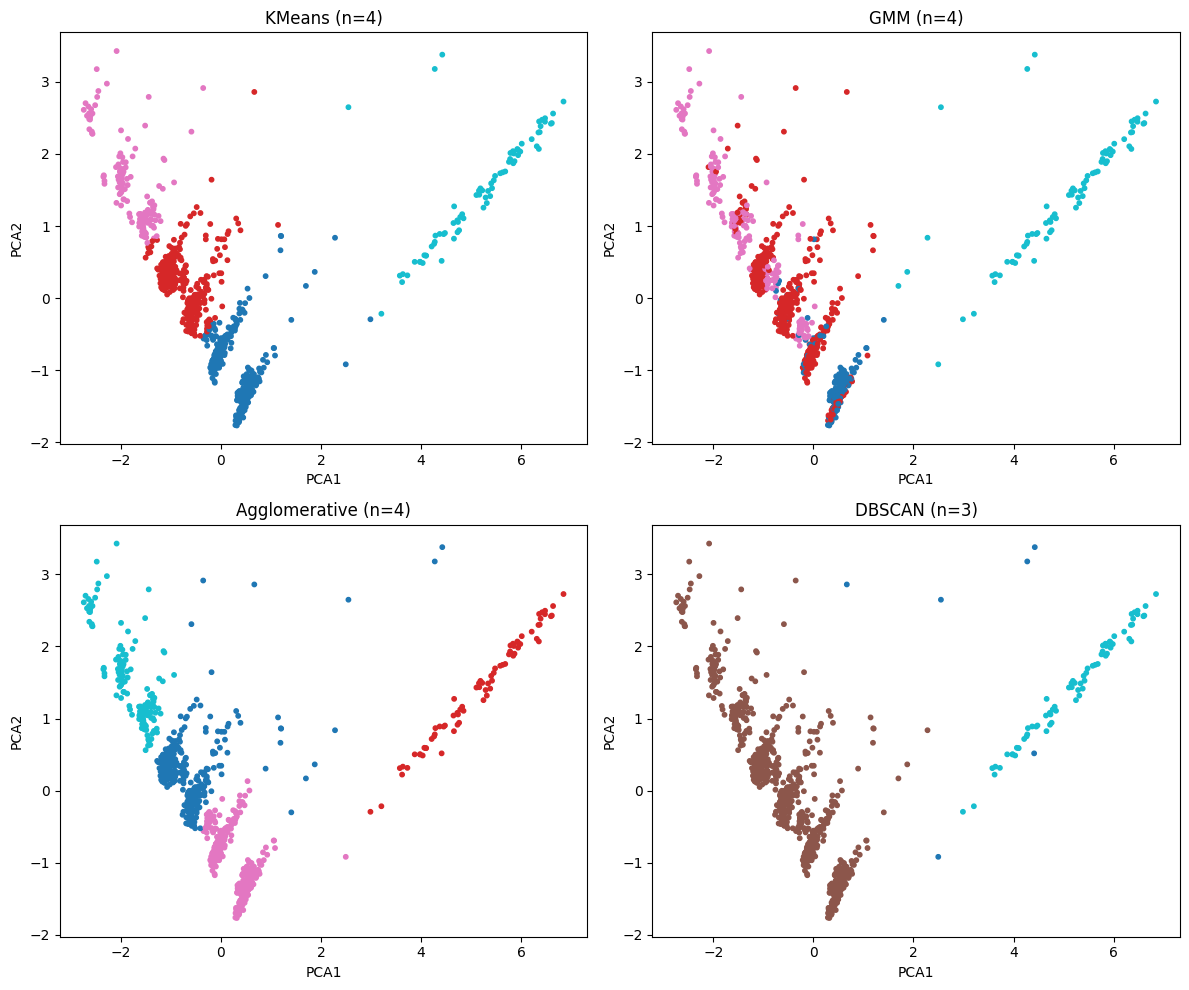

In [112]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA for 2D visualization
pca = PCA(n_components=2, random_state=42)
pca_2d = pca.fit_transform(X_scaled)
df_cust['pca1'] = pca_2d[:, 0]
df_cust['pca2'] = pca_2d[:, 1]

models = ['KMeans', 'GMM', 'Agglomerative', 'DBSCAN']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for ax, model in zip(axes, models):
    labels = results[model]['labels']

    # ✅ Skip models with wrong length
    if len(labels) != len(df_cust):
        ax.set_title(f"{model} ❌ (Label length mismatch)")
        ax.axis('off')
        continue

    ax.scatter(df_cust['pca1'], df_cust['pca2'], c=labels, cmap='tab10', s=10)
    ax.set_title(f"{model} (n={len(set(labels))})")
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')

plt.tight_layout()
plt.show()


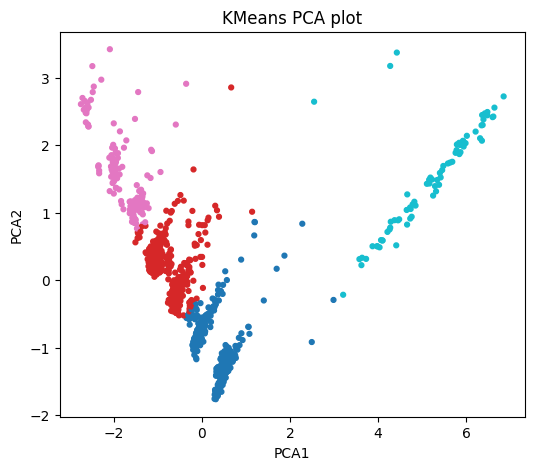

KMeans: 4 clusters (excluding noise). Top cluster sizes: 0:409, 1:345, 2:153


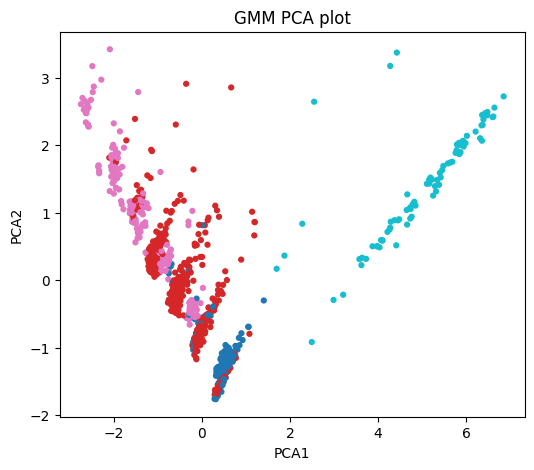

GMM: 4 clusters (excluding noise). Top cluster sizes: 1:514, 2:204, 0:184


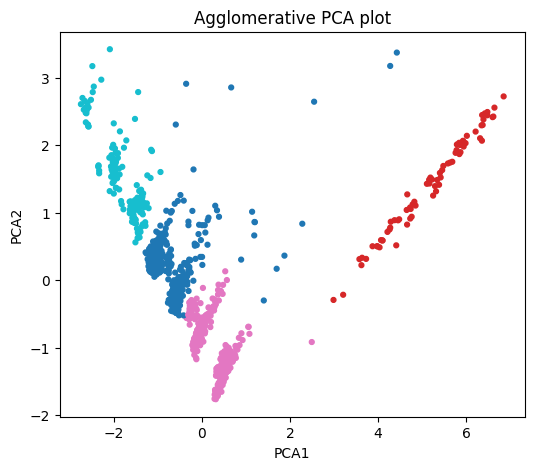

Agglomerative: 4 clusters (excluding noise). Top cluster sizes: 2:414, 0:336, 3:159


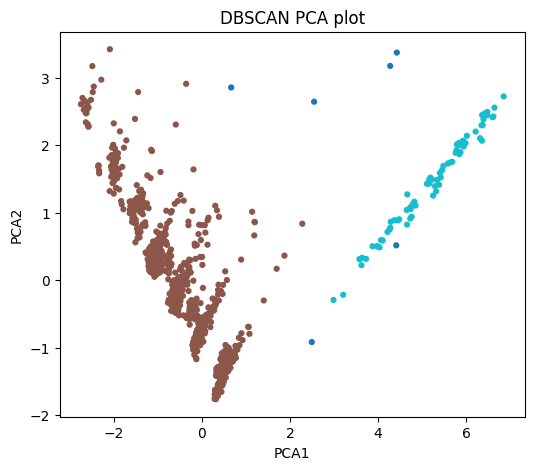

DBSCAN: 2 clusters (excluding noise). Top cluster sizes: 0:904, 1:73; noise:6 pts


In [113]:

# Individual per-model plots and short insights (automated)
from collections import Counter

def short_insight(name, labels):
    cnt = Counter(labels)
    # ignore noise marker -1 in DBSCAN for counts/inference
    sorted_counts = sorted([(lab, c) for lab,c in cnt.items() if lab != -1], key=lambda x: x[1], reverse=True)
    insight = f"{name}: {len(sorted_counts)} clusters (excluding noise). Top cluster sizes: " + ", ".join([f'{lab}:{c}' for lab,c in sorted_counts[:3]])
    if -1 in cnt:
        insight += f"; noise:{cnt[-1]} pts"
    return insight

for model in ['KMeans','GMM','Agglomerative','DBSCAN']:
    labels = results[model]['labels']
    plt.figure(figsize=(6,5))
    plt.scatter(df_cust['pca1'], df_cust['pca2'], c=labels, cmap='tab10', s=12)
    plt.title(f'{model} PCA plot')
    plt.xlabel('PCA1'); plt.ylabel('PCA2')
    plt.show()
    print(short_insight(model, labels))


In [114]:
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

# Ensure FEATURES exists
try:
    FEATURES
except NameError:
    FEATURES = [c for c in df_cust.columns if c not in ['pca1','pca2','cluster_label']]

model_dropdown = widgets.Dropdown(
    options=list(results.keys()),
    value='KMeans',
    description='Model:'
)

def update_plot(model_name):
    labels = results[model_name]['labels']
    plot_df = df_cust.copy()
    plot_df['cluster_label'] = labels

    # ✅ Only include hover columns that exist
    hover_cols = ['cc_num'] + [c for c in FEATURES if c in plot_df.columns]

    fig = px.scatter(
        plot_df,
        x='pca1',
        y='pca2',
        color=plot_df['cluster_label'].astype(str),
        hover_data=hover_cols,
        title=f'Clusters: {model_name} (PCA projection)'
    )
    fig.update_traces(marker=dict(size=6))
    fig.show()

out = widgets.interactive_output(update_plot, {'model_name': model_dropdown})
display(model_dropdown, out)


Dropdown(description='Model:', options=('KMeans', 'GMM', 'Agglomerative', 'DBSCAN'), value='KMeans')

Output()

In [115]:
results = {}
k = 4

km = KMeans(n_clusters=k, random_state=42)
results['KMeans'] = {
    "model": km.fit(X_scaled),
    "labels": km.labels_
}

gmm = GaussianMixture(n_components=k, random_state=42)
results['GMM'] = {
    "model": gmm.fit(X_scaled),
    "labels": gmm.predict(X_scaled)
}

agg = AgglomerativeClustering(n_clusters=k)
results['Agglomerative'] = {
    "model": agg.fit(X_scaled),
    "labels": agg.labels_
}

db = DBSCAN(eps=1.5, min_samples=6)
results['DBSCAN'] = {
    "model": db.fit(X_scaled),
    "labels": db.labels_
}


In [116]:
import os
# Save results + models
os.makedirs('clustering_outputs', exist_ok=True)
df_cust.to_csv('clustering_outputs/df_cust_with_clusters.csv', index=False)
joblib.dump(scaler, 'clustering_outputs/scaler.joblib')
joblib.dump(results['KMeans']['model'], 'clustering_outputs/kmeans_model.joblib')
print("Saved outputs to clustering_outputs/")


Saved outputs to clustering_outputs/


In [117]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import numpy as np

def cluster_stability_test(model, X, n_runs=5, sample_frac=0.8):
    ari_scores, nmi_scores = [], []
    for i in range(n_runs):
        # random subsample
        X_sub = X.sample(frac=sample_frac, random_state=42+i)
        labels1 = model.fit_predict(X_sub)
        labels2 = model.fit_predict(X_sub.sample(frac=1.0, random_state=99+i))
        ari = adjusted_rand_score(labels1, labels2)
        nmi = normalized_mutual_info_score(labels1, labels2)
        ari_scores.append(ari)
        nmi_scores.append(nmi)
    return np.mean(ari_scores), np.mean(nmi_scores)

stability_results = {}
for name, info in results.items():
    if hasattr(info['model'], 'fit_predict'):
        ari, nmi = cluster_stability_test(info['model'], pd.DataFrame(X_scaled))
        stability_results[name] = {'ARI': round(ari,3), 'NMI': round(nmi,3)}

pd.DataFrame(stability_results).T


ARI    NMI
KMeans        -0.003  0.004
GMM           -0.004  0.004
Agglomerative -0.003  0.004
DBSCAN        -0.016  0.005

In [118]:
import pandas as pd
from scipy.stats import f_oneway

def cluster_feature_importance(df, cluster_col):
    numeric_cols = df.select_dtypes(include='number').columns.tolist()
    features = [f for f in numeric_cols if f != cluster_col]

    stats = []
    for f in features:
        groups = [df[df[cluster_col] == c][f].dropna() for c in sorted(df[cluster_col].unique())]
        if len(groups) > 1:
            f_stat, p_val = f_oneway(*groups)
            stats.append((f, round(f_stat,2), round(p_val,5)))

    result = pd.DataFrame(stats, columns=['Feature','F-Statistic','p-value'])
    result['Importance %'] = (result['F-Statistic'] / result['F-Statistic'].sum() * 100).round(2)
    result = result.sort_values('F-Statistic', ascending=False)

    return result

# Run for KMeans
importance_df = cluster_feature_importance(df_cust, 'KMeans_cluster')
importance_df



Feature  F-Statistic  p-value  Importance %
9                    pca1      4248.55  0.00000         25.61
3               avg_spend      2454.11  0.00000         14.79
1               txn_count      2205.01  0.00000         13.29
7   Agglomerative_cluster      1985.82  0.00000         11.97
2             total_spend      1811.93  0.00000         10.92
10                   pca2      1348.61  0.00000          8.13
8          DBSCAN_cluster      1011.60  0.00000          6.10
5            recency_days       681.97  0.00000          4.11
6             GMM_cluster       537.75  0.00000          3.24
4               std_spend       305.14  0.00000          1.84
0                  cc_num         0.05  0.98353          0.00

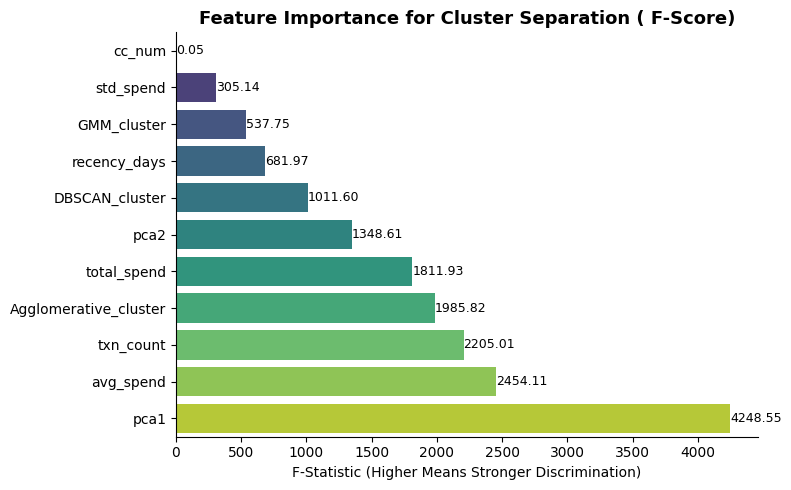

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_df = importance_df.sort_values('F-Statistic', ascending=True)

plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=plot_df,
    x='F-Statistic',
    y='Feature',
    hue='F-Statistic',
    dodge=False,
    palette='viridis'
)

# Value labels
for i, v in enumerate(plot_df['F-Statistic']):
    ax.text(v + 0.05, i, f"{v:.2f}", va='center', fontsize=9)

plt.title("Feature Importance for Cluster Separation ( F-Score)", fontsize=13, weight='bold')
plt.xlabel("F-Statistic (Higher Means Stronger Discrimination)")
plt.ylabel("")
plt.legend([],[], frameon=False)   # Remove legend
sns.despine()
plt.tight_layout()
plt.show()



In [120]:
def label_clusters(df, cluster_col, features):
    # Show mean profile of each cluster
    summary = df.groupby(cluster_col)[features].mean().round(2)
    display(summary)

    # Create mapping based on summary
    mapping = {
        0: "High-Value Loyalists",
        1: "Discount Seekers",
        2: "At-Risk / Dormant",
        3: "New / Emerging Customers"
    }

    df['cluster_name'] = df[cluster_col].map(mapping)
    return df, mapping

# Example usage
df_cust, cluster_labels = label_clusters(df_cust, 'KMeans_cluster', features)
df_cust.head()


txn_count  total_spend  avg_spend  std_spend  recency_days
KMeans_cluster                                                            
0                  747.43     52613.84      72.13     134.94          0.98
1                 1708.81    113561.15      67.84     140.41          0.04
2                 2605.64    195251.61      76.03     141.60          0.00
3                   36.47      8569.41     586.44     409.39        268.45

cc_num  txn_count  total_spend   avg_spend    std_spend  recency_days  \
0  60416207185       1518     85043.47   56.023366   122.632635             0   
1  60422928733       1531    105640.20   69.000784   102.681962             0   
2  60423098130        510     58673.63  115.046333  1202.988005             2   
3  60427851591        528     59129.61  111.987898   143.310653             1   
4  60487002085        496     25160.11   50.726028    65.843969             0   

   KMeans_cluster  GMM_cluster  Agglomerative_cluster  DBSCAN_cluster  \
0               1            1                      0               0   
1               1            1                      0               0   
2               3            3                      0              -1   
3               0            0                      2               0   
4               0            0                      2               0   

       pca1      pca2              cluster_name  
0 -0.483145 -0.308017          Discount Seekers  
1 -0.672308 -0.156950          Discount Seekers  
2  4.424348  3.377119  New / Emerging Customers  
3  0.539300 -0.963322      High-Value Loyalists  
4  0.318513 -1.767377      High-Value Loyalists

In [121]:
def generate_cluster_kpis(df, cluster_col):
    kpi = df.groupby(cluster_col).agg(
        customers=('cc_num', 'count'),
        total_revenue=('total_spend', 'sum'),
        avg_revenue_per_customer=('total_spend', 'mean'),
        avg_transactions=('txn_count', 'mean'),
        avg_order_value=('avg_spend', 'mean'),
        avg_spend_std=('std_spend', 'mean'),
        avg_recency_days=('recency_days', 'mean')
    )

    # % Share of Customers & Revenue
    kpi['customer_share_%'] = (kpi['customers'] / kpi['customers'].sum() * 100).round(2)
    kpi['revenue_share_%'] = (kpi['total_revenue'] / kpi['total_revenue'].sum() * 100).round(2)

    return kpi.round(2)

# Example for KMeans clusters
kpi_df = generate_cluster_kpis(df_cust, 'KMeans_cluster')
kpi_df


customers  total_revenue  avg_revenue_per_customer  \
KMeans_cluster                                                       
0                     409    21519061.30                  52613.84   
1                     345    39178596.56                 113561.15   
2                     153    29873495.61                 195251.61   
3                      76      651275.43                   8569.41   

                avg_transactions  avg_order_value  avg_spend_std  \
KMeans_cluster                                                     
0                         747.43            72.13         134.94   
1                        1708.81            67.84         140.41   
2                        2605.64            76.03         141.60   
3                          36.47           586.44         409.39   

                avg_recency_days  customer_share_%  revenue_share_%  
KMeans_cluster                                                       
0                           0.98             41.61            23.59  
1                           0.04             35.10            42.95  
2                           0.00             15.56            32.75  
3                         268.45              7.73             0.71

In [122]:
cluster_kpis = df_cust.groupby(['KMeans_cluster','cluster_name']).agg({
    'txn_count': 'mean',
    'total_spend': 'mean',
    'recency_days': 'mean'
}).round(2).reset_index()


display(cluster_kpis)

import plotly.express as px
fig = px.bar(cluster_kpis, x='cluster_name', y='total_spend', color='cluster_name',
             title="Average Monetary Value by Cluster")
fig.show()


KMeans_cluster              cluster_name  txn_count  total_spend  \
0               0      High-Value Loyalists     747.43     52613.84   
1               1          Discount Seekers    1708.81    113561.15   
2               2         At-Risk / Dormant    2605.64    195251.61   
3               3  New / Emerging Customers      36.47      8569.41   

   recency_days  
0          0.98  
1          0.04  
2          0.00  
3        268.45